In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function
import torch
import torch.nn as nn
import os
import numpy as np

from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from scipy.io import mmread

import pandas as pd


In [195]:


cv = 0
DATA_DIR = './ml-1m-5cv'
train = mmread(os.path.join(DATA_DIR,'train.%s'%cv)).A
test = mmread(os.path.join(DATA_DIR,'test.%s'%cv)).A
targets = np.unique(test.nonzero()[0])

class MLIRDataset(Dataset):
    def __init__(self, root_dir, cv, part, tranform = None):
        self.train = mmread(os.path.join(root_dir,'train.%s'%cv)).A
        self.test = mmread(os.path.join(root_dir,'test.%s'%cv)).A
        self.data = train + test
        self.targets = np.unique(test.nonzero()[0])
        self.part = part
        self.transform = tranform

    def __len__(self):
        return train.shape[1]

    def __getitem__(self, idx):
        if self.part == 'train':
            sample = self.train[:,idx]
        elif self.part == 'test':
            sample = self.test[:,idx]
        elif self.part == 'all':
            sample = self.data[:,idx]
        else:
            raise AttributeError('which part of data to fetch?')
        if self.transform:
            sample = self.transform(sample)
        return {'id':idx,'sample':sample}


# load dataset

In [10]:
import dataset
reload(dataset)
cv = 0
data = dataset.load_data(cv=cv)

# build model

In [3]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)
        self.repres = dict()

    def forward(self, x):
        out = self.encoder(x)
        self.repres['hidden'] = out.clone()
        out = self.relu(out)
        self.repres['hidden_relu'] = out.clone()
        out = self.decoder(out)
        self.repres['output'] = out.clone()
        return out



In [4]:
import rec 
# reload(rec)
def pred_recommend(train, test, predicted):
    r = rec.Rec(topk = 5)
    r.fit(train.T)
    t = predicted.T
    targets = np.unique(test.nonzero()[0])
    r.predict( t,targets)
    perf = r.evaluate(test)
    return perf

In [73]:
del IBCF
from cf2 import IBCF
def cf_on_hidden_layer(knn, train, hidden_layers, test):
    test = test
    targets = np.unique(test.nonzero()[0])
    cf = IBCF(sim='cosine',knn=knn,topk=5)
# #     precision, recall = cf.score(train.T, test)
# #     print(precision,recall)
    cf.fit(train.T, X=hidden_layers.T)
    cf.predict(targets)
    perf = (knn,cf.evaluate(test) )
    return perf

In [67]:
    cf = IBCF(sim='cosine',knn=knn,topk=5)
    cf.fit(data.train_dataset.train.T)


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

<cf.IBCF instance at 0x7fb0f8f5f9e0>

In [68]:
cf.similarities_.shape

(3706, 3706)

Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0440
Epoch [1/20], Step [2/38], Loss: 0.0488
Epoch [1/20], Step [3/38], Loss: 0.0464
Epoch [1/20], Step [4/38], Loss: 0.0395
Epoch [1/20], Step [5/38], Loss: 0.0371
Epoch [1/20], Step [6/38], Loss: 0.0501
Epoch [1/20], Step [7/38], Loss: 0.0440
Epoch [1/20], Step [8/38], Loss: 0.0407
Epoch [1/20], Step [9/38], Loss: 0.0383
Epoch [1/20], Step [10/38], Loss: 0.0398
Epoch [1/20], Step [11/38], Loss: 0.0341
Epoch [1/20], Step [12/38], Loss: 0.0318
Epoch [1/20], Step [13/38], Loss: 0.0365
Epoch [1/20], Step [14/38], Loss: 0.0392
Epoch [1/20], Step [15/38], Loss: 0.0336
Epoch [1/20], Step [16/38], Loss: 0.0322
Epoch [1/20], Step [17/38], Loss: 0.0330
Epoch [1/20], Step [18/38], Loss: 0.0301
Epoch [1/20], Step [19/38], Loss: 0.0305
Epoch [1/20], Step [20/38], Loss: 0.0333
Epoch [1/20], Step [21/38], Loss: 0.0346
Epoch [1/20], Step [22/38], Loss: 0.0282
Epoch [1/20],

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [6/20], Step [1/38], Loss: 0.0316
Epoch [6/20], Step [2/38], Loss: 0.0272
Epoch [6/20], Step [3/38], Loss: 0.0294
Epoch [6/20], Step [4/38], Loss: 0.0253
Epoch [6/20], Step [5/38], Loss: 0.0273
Epoch [6/20], Step [6/38], Loss: 0.0192
Epoch [6/20], Step [7/38], Loss: 0.0261
Epoch [6/20], Step [8/38], Loss: 0.0274
Epoch [6/20], Step [9/38], Loss: 0.0234
Epoch [6/20], Step [10/38], Loss: 0.0254
Epoch [6/20], Step [11/38], Loss: 0.0220
Epoch [6/20], Step [12/38], Loss: 0.0244
Epoch [6/20], Step [13/38], Loss: 0.0294
Epoch [6/20], Step [14/38], Loss: 0.0275
Epoch [6/20], Step [15/38], Loss: 0.0241
Epoch [6/20], Step [16/38], Loss: 0.0266
Epoch [6/20], Step [17/38], Loss: 0.0270
Epoch [6/20], Step [18/38], Loss: 0.0261
Epoch [6/20], Step [19/38], Loss: 0.0238
Epoch [6/20], Step [20/38], Loss: 0.0259
Epoch [6/20], Step [21/38], Loss: 0.0259
Epoch [6/20], Step [22/38], Loss: 0.0235
Epoch [6/20], Step [23/38], Loss: 0.0246
Epoch [6/20], Step [24/38], Loss: 0.0274
Epoch [6/20], Step [25/38

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [11/20], Step [1/38], Loss: 0.0239
Epoch [11/20], Step [2/38], Loss: 0.0238
Epoch [11/20], Step [3/38], Loss: 0.0275
Epoch [11/20], Step [4/38], Loss: 0.0275
Epoch [11/20], Step [5/38], Loss: 0.0250
Epoch [11/20], Step [6/38], Loss: 0.0227
Epoch [11/20], Step [7/38], Loss: 0.0248
Epoch [11/20], Step [8/38], Loss: 0.0246
Epoch [11/20], Step [9/38], Loss: 0.0260
Epoch [11/20], Step [10/38], Loss: 0.0267
Epoch [11/20], Step [11/38], Loss: 0.0238
Epoch [11/20], Step [12/38], Loss: 0.0258
Epoch [11/20], Step [13/38], Loss: 0.0198
Epoch [11/20], Step [14/38], Loss: 0.0297
Epoch [11/20], Step [15/38], Loss: 0.0245
Epoch [11/20], Step [16/38], Loss: 0.0235
Epoch [11/20], Step [17/38], Loss: 0.0249
Epoch [11/20], Step [18/38], Loss: 0.0249
Epoch [11/20], Step [19/38], Loss: 0.0224
Epoch [11/20], Step [20/38], Loss: 0.0243
Epoch [11/20], Step [21/38], Loss: 0.0201
Epoch [11/20], Step [22/38], Loss: 0.0231
Epoch [11/20], Step [23/38], Loss: 0.0256
Epoch [11/20], Step [24/38], Loss: 0.0242
E

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [16/20], Step [1/38], Loss: 0.0251
Epoch [16/20], Step [2/38], Loss: 0.0232
Epoch [16/20], Step [3/38], Loss: 0.0191
Epoch [16/20], Step [4/38], Loss: 0.0243
Epoch [16/20], Step [5/38], Loss: 0.0257
Epoch [16/20], Step [6/38], Loss: 0.0251
Epoch [16/20], Step [7/38], Loss: 0.0219
Epoch [16/20], Step [8/38], Loss: 0.0266
Epoch [16/20], Step [9/38], Loss: 0.0266
Epoch [16/20], Step [10/38], Loss: 0.0263
Epoch [16/20], Step [11/38], Loss: 0.0196
Epoch [16/20], Step [12/38], Loss: 0.0211
Epoch [16/20], Step [13/38], Loss: 0.0219
Epoch [16/20], Step [14/38], Loss: 0.0281
Epoch [16/20], Step [15/38], Loss: 0.0281
Epoch [16/20], Step [16/38], Loss: 0.0212
Epoch [16/20], Step [17/38], Loss: 0.0217
Epoch [16/20], Step [18/38], Loss: 0.0230
Epoch [16/20], Step [19/38], Loss: 0.0178
Epoch [16/20], Step [20/38], Loss: 0.0210
Epoch [16/20], Step [21/38], Loss: 0.0238
Epoch [16/20], Step [22/38], Loss: 0.0245
Epoch [16/20], Step [23/38], Loss: 0.0229
Epoch [16/20], Step [24/38], Loss: 0.0206
E

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

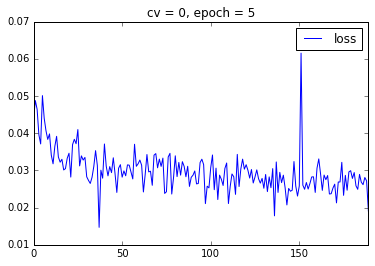

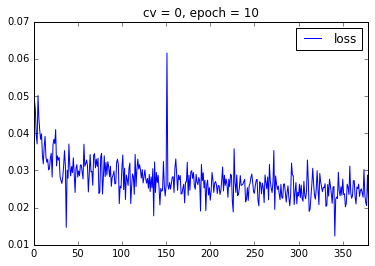

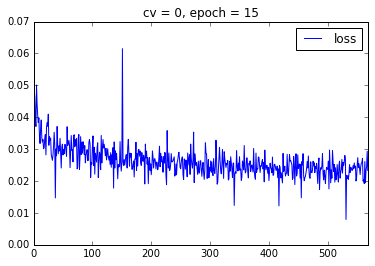

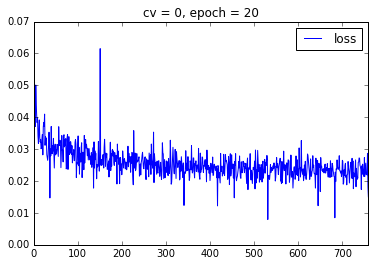

In [84]:
input_size = 6040
hidden_size = 350
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 20
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    repres = dict()
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s'%(cv,epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            


In [85]:
cf_perf

{(5, 'hidden'): (500, (0.37516556291390729, 0.034900114598960724)),
 (5, 'hidden_relu'): (500, (0.45033112582781459, 0.043737300975070247)),
 (5, 'output'): (500, (0.45298013245033114, 0.044840039253459571)),
 (10, 'hidden'): (500, (0.34801324503311259, 0.034425216827851476)),
 (10, 'hidden_relu'): (500, (0.47913907284768209, 0.049629034740753614)),
 (10, 'output'): (500, (0.47615894039735102, 0.048411236118714021)),
 (15, 'hidden'): (500, (0.35397350993377485, 0.035040223278875168)),
 (15, 'hidden_relu'): (500, (0.48576158940397346, 0.049799332029593558)),
 (15, 'output'): (500, (0.47715231788079476, 0.048904906176084867)),
 (20, 'hidden'): (500, (0.35430463576158938, 0.035570969891828196)),
 (20, 'hidden_relu'): (500, (0.49966887417218547, 0.054753975683767983)),
 (20, 'output'): (500, (0.49635761589403976, 0.052610759975120984))}

In [86]:
pred_perf

{5: (0.47582781456953638, 0.045369370347833421),
 10: (0.55728476821192052, 0.060536584798842136),
 15: (0.56158940397350987, 0.063003713585330856),
 20: (0.56721854304635766, 0.065570316642590262)}

500 hidden

In [88]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
#     import md5, sha

Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0468
Epoch [1/20], Step [2/38], Loss: 0.0444
Epoch [1/20], Step [3/38], Loss: 0.0346
Epoch [1/20], Step [4/38], Loss: 0.0487
Epoch [1/20], Step [5/38], Loss: 0.0334
Epoch [1/20], Step [6/38], Loss: 0.0460
Epoch [1/20], Step [7/38], Loss: 0.0431
Epoch [1/20], Step [8/38], Loss: 0.0338
Epoch [1/20], Step [9/38], Loss: 0.0333
Epoch [1/20], Step [10/38], Loss: 0.0424
Epoch [1/20], Step [11/38], Loss: 0.0326
Epoch [1/20], Step [12/38], Loss: 0.0415
Epoch [1/20], Step [13/38], Loss: 0.0312
Epoch [1/20], Step [14/38], Loss: 0.0313
Epoch [1/20], Step [15/38], Loss: 0.0329
Epoch [1/20], Step [16/38], Loss: 0.0323
Epoch [1/20], Step [17/38], Loss: 0.0257
Epoch [1/20], Step [18/38], Loss: 0.0386
Epoch [1/20], Step [19/38], Loss: 0.0315
Epoch [1/20], Step [20/38], Loss: 0.0278
Epoch [1/20], Step [21/38], Loss: 0.0286
Epoch [1/20], Step [22/38], Loss: 0.0327
Epoch [1/20],

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [6/20], Step [1/38], Loss: 0.0236
Epoch [6/20], Step [2/38], Loss: 0.0276
Epoch [6/20], Step [3/38], Loss: 0.0258
Epoch [6/20], Step [4/38], Loss: 0.0228
Epoch [6/20], Step [5/38], Loss: 0.0225
Epoch [6/20], Step [6/38], Loss: 0.0269
Epoch [6/20], Step [7/38], Loss: 0.0265
Epoch [6/20], Step [8/38], Loss: 0.0277
Epoch [6/20], Step [9/38], Loss: 0.0257
Epoch [6/20], Step [10/38], Loss: 0.0280
Epoch [6/20], Step [11/38], Loss: 0.0224
Epoch [6/20], Step [12/38], Loss: 0.0273
Epoch [6/20], Step [13/38], Loss: 0.0229
Epoch [6/20], Step [14/38], Loss: 0.0314
Epoch [6/20], Step [15/38], Loss: 0.0262
Epoch [6/20], Step [16/38], Loss: 0.0309
Epoch [6/20], Step [17/38], Loss: 0.0285
Epoch [6/20], Step [18/38], Loss: 0.0263
Epoch [6/20], Step [19/38], Loss: 0.0215
Epoch [6/20], Step [20/38], Loss: 0.0283
Epoch [6/20], Step [21/38], Loss: 0.0248
Epoch [6/20], Step [22/38], Loss: 0.0176
Epoch [6/20], Step [23/38], Loss: 0.0204
Epoch [6/20], Step [24/38], Loss: 0.0248
Epoch [6/20], Step [25/38

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [11/20], Step [1/38], Loss: 0.0217
Epoch [11/20], Step [2/38], Loss: 0.0198
Epoch [11/20], Step [3/38], Loss: 0.0231
Epoch [11/20], Step [4/38], Loss: 0.0260
Epoch [11/20], Step [5/38], Loss: 0.0219
Epoch [11/20], Step [6/38], Loss: 0.0232
Epoch [11/20], Step [7/38], Loss: 0.0219
Epoch [11/20], Step [8/38], Loss: 0.0207
Epoch [11/20], Step [9/38], Loss: 0.0283
Epoch [11/20], Step [10/38], Loss: 0.0249
Epoch [11/20], Step [11/38], Loss: 0.0238
Epoch [11/20], Step [12/38], Loss: 0.0205
Epoch [11/20], Step [13/38], Loss: 0.0239
Epoch [11/20], Step [14/38], Loss: 0.0258
Epoch [11/20], Step [15/38], Loss: 0.0221
Epoch [11/20], Step [16/38], Loss: 0.0212
Epoch [11/20], Step [17/38], Loss: 0.0206
Epoch [11/20], Step [18/38], Loss: 0.0240
Epoch [11/20], Step [19/38], Loss: 0.0214
Epoch [11/20], Step [20/38], Loss: 0.0245
Epoch [11/20], Step [21/38], Loss: 0.0279
Epoch [11/20], Step [22/38], Loss: 0.0207
Epoch [11/20], Step [23/38], Loss: 0.0271
Epoch [11/20], Step [24/38], Loss: 0.0252
E

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [16/20], Step [1/38], Loss: 0.0230
Epoch [16/20], Step [2/38], Loss: 0.0246
Epoch [16/20], Step [3/38], Loss: 0.0250
Epoch [16/20], Step [4/38], Loss: 0.0234
Epoch [16/20], Step [5/38], Loss: 0.0225
Epoch [16/20], Step [6/38], Loss: 0.0198
Epoch [16/20], Step [7/38], Loss: 0.0219
Epoch [16/20], Step [8/38], Loss: 0.0185
Epoch [16/20], Step [9/38], Loss: 0.0262
Epoch [16/20], Step [10/38], Loss: 0.0237
Epoch [16/20], Step [11/38], Loss: 0.0190
Epoch [16/20], Step [12/38], Loss: 0.0265
Epoch [16/20], Step [13/38], Loss: 0.0201
Epoch [16/20], Step [14/38], Loss: 0.0226
Epoch [16/20], Step [15/38], Loss: 0.0225
Epoch [16/20], Step [16/38], Loss: 0.0236
Epoch [16/20], Step [17/38], Loss: 0.0182
Epoch [16/20], Step [18/38], Loss: 0.0214
Epoch [16/20], Step [19/38], Loss: 0.0221
Epoch [16/20], Step [20/38], Loss: 0.0215
Epoch [16/20], Step [21/38], Loss: 0.0228
Epoch [16/20], Step [22/38], Loss: 0.0277
Epoch [16/20], Step [23/38], Loss: 0.0230
Epoch [16/20], Step [24/38], Loss: 0.0191
E

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

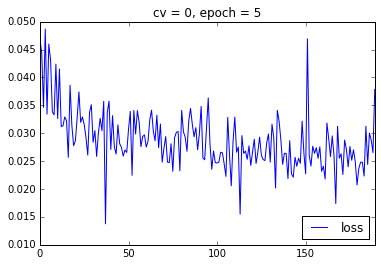

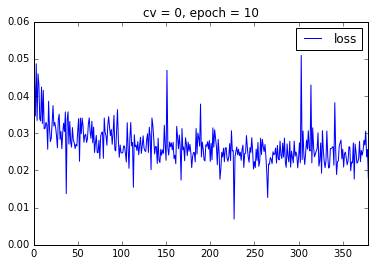

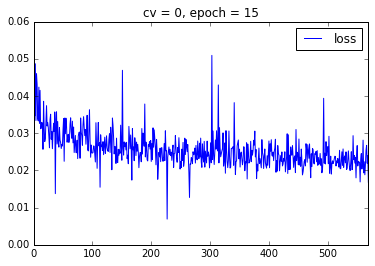

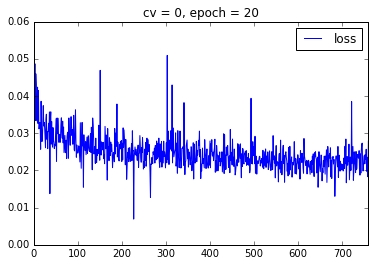

In [87]:
input_size = 6040
hidden_size = 500
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 20
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    repres = dict()
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s'%(cv,epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            


In [90]:
pred_perf

{5: (0.51324503311258274, 0.052917845123632005),
 10: (0.53178807947019868, 0.059133627352905262),
 15: (0.55629139072847678, 0.063207879523437718),
 20: (0.53708609271523178, 0.06045966455964135)}

In [91]:
cf_perf

{(5, 'hidden'): (500, (0.37086092715231789, 0.035267996718551922)),
 (5, 'hidden_relu'): (500, (0.47814569536423851, 0.049989199841929607)),
 (5, 'output'): (500, (0.46622516556291393, 0.046411687045305051)),
 (10, 'hidden'): (500, (0.37549668874172187, 0.036230767779383499)),
 (10, 'hidden_relu'): (500, (0.49370860927152327, 0.053229946021588877)),
 (10, 'output'): (500, (0.47615894039735102, 0.049251427348002641)),
 (15, 'hidden'): (500, (0.3688741721854305, 0.036105341843940868)),
 (15, 'hidden_relu'): (500, (0.50761589403973517, 0.056428370510076625)),
 (15, 'output'): (500, (0.49105960264900667, 0.051864236838287253)),
 (20, 'hidden'): (500, (0.3566225165562914, 0.035541512245994375)),
 (20, 'hidden_relu'): (500, (0.51158940397350994, 0.056075419760331882)),
 (20, 'output'): (500, (0.5069536423841059, 0.055292202609316256))}

1000 hidden

Net (
  (encoder): Linear (6040 -> 1000)
  (relu): ReLU ()
  (decoder): Linear (1000 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0399
Epoch [1/20], Step [2/38], Loss: 0.0489
Epoch [1/20], Step [3/38], Loss: 0.0375
Epoch [1/20], Step [4/38], Loss: 0.0354
Epoch [1/20], Step [5/38], Loss: 0.0315
Epoch [1/20], Step [6/38], Loss: 0.0326
Epoch [1/20], Step [7/38], Loss: 0.0378
Epoch [1/20], Step [8/38], Loss: 0.0355
Epoch [1/20], Step [9/38], Loss: 0.0305
Epoch [1/20], Step [10/38], Loss: 0.0297
Epoch [1/20], Step [11/38], Loss: 0.0318
Epoch [1/20], Step [12/38], Loss: 0.0336
Epoch [1/20], Step [13/38], Loss: 0.0277
Epoch [1/20], Step [14/38], Loss: 0.0355
Epoch [1/20], Step [15/38], Loss: 0.0294
Epoch [1/20], Step [16/38], Loss: 0.0421
Epoch [1/20], Step [17/38], Loss: 0.0266
Epoch [1/20], Step [18/38], Loss: 0.0353
Epoch [1/20], Step [19/38], Loss: 0.0265
Epoch [1/20], Step [20/38], Loss: 0.0331
Epoch [1/20], Step [21/38], Loss: 0.0304
Epoch [1/20], Step [22/38], Loss: 0.0330
Epoch [1/20

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [6/20], Step [1/38], Loss: 0.0181
Epoch [6/20], Step [2/38], Loss: 0.0240
Epoch [6/20], Step [3/38], Loss: 0.0231
Epoch [6/20], Step [4/38], Loss: 0.0197
Epoch [6/20], Step [5/38], Loss: 0.0218
Epoch [6/20], Step [6/38], Loss: 0.0240
Epoch [6/20], Step [7/38], Loss: 0.0232
Epoch [6/20], Step [8/38], Loss: 0.0200
Epoch [6/20], Step [9/38], Loss: 0.0207
Epoch [6/20], Step [10/38], Loss: 0.0274
Epoch [6/20], Step [11/38], Loss: 0.0259
Epoch [6/20], Step [12/38], Loss: 0.0204
Epoch [6/20], Step [13/38], Loss: 0.0233
Epoch [6/20], Step [14/38], Loss: 0.0239
Epoch [6/20], Step [15/38], Loss: 0.0196
Epoch [6/20], Step [16/38], Loss: 0.0233
Epoch [6/20], Step [17/38], Loss: 0.0282
Epoch [6/20], Step [18/38], Loss: 0.0208
Epoch [6/20], Step [19/38], Loss: 0.0209
Epoch [6/20], Step [20/38], Loss: 0.0264
Epoch [6/20], Step [21/38], Loss: 0.0214
Epoch [6/20], Step [22/38], Loss: 0.0267
Epoch [6/20], Step [23/38], Loss: 0.0197
Epoch [6/20], Step [24/38], Loss: 0.0221
Epoch [6/20], Step [25/38

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [11/20], Step [1/38], Loss: 0.0207
Epoch [11/20], Step [2/38], Loss: 0.0204
Epoch [11/20], Step [3/38], Loss: 0.0217
Epoch [11/20], Step [4/38], Loss: 0.0170
Epoch [11/20], Step [5/38], Loss: 0.0213
Epoch [11/20], Step [6/38], Loss: 0.0185
Epoch [11/20], Step [7/38], Loss: 0.0178
Epoch [11/20], Step [8/38], Loss: 0.0247
Epoch [11/20], Step [9/38], Loss: 0.0165
Epoch [11/20], Step [10/38], Loss: 0.0201
Epoch [11/20], Step [11/38], Loss: 0.0197
Epoch [11/20], Step [12/38], Loss: 0.0228
Epoch [11/20], Step [13/38], Loss: 0.0194
Epoch [11/20], Step [14/38], Loss: 0.0234
Epoch [11/20], Step [15/38], Loss: 0.0213
Epoch [11/20], Step [16/38], Loss: 0.0232
Epoch [11/20], Step [17/38], Loss: 0.0194
Epoch [11/20], Step [18/38], Loss: 0.0169
Epoch [11/20], Step [19/38], Loss: 0.0188
Epoch [11/20], Step [20/38], Loss: 0.0222
Epoch [11/20], Step [21/38], Loss: 0.0197
Epoch [11/20], Step [22/38], Loss: 0.0190
Epoch [11/20], Step [23/38], Loss: 0.0229
Epoch [11/20], Step [24/38], Loss: 0.0176
E

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [16/20], Step [1/38], Loss: 0.0183
Epoch [16/20], Step [2/38], Loss: 0.0183
Epoch [16/20], Step [3/38], Loss: 0.0173
Epoch [16/20], Step [4/38], Loss: 0.0199
Epoch [16/20], Step [5/38], Loss: 0.0197
Epoch [16/20], Step [6/38], Loss: 0.0153
Epoch [16/20], Step [7/38], Loss: 0.0154
Epoch [16/20], Step [8/38], Loss: 0.0236
Epoch [16/20], Step [9/38], Loss: 0.0208
Epoch [16/20], Step [10/38], Loss: 0.0196
Epoch [16/20], Step [11/38], Loss: 0.0198
Epoch [16/20], Step [12/38], Loss: 0.0168
Epoch [16/20], Step [13/38], Loss: 0.0197
Epoch [16/20], Step [14/38], Loss: 0.0186
Epoch [16/20], Step [15/38], Loss: 0.0216
Epoch [16/20], Step [16/38], Loss: 0.0176
Epoch [16/20], Step [17/38], Loss: 0.0187
Epoch [16/20], Step [18/38], Loss: 0.0207
Epoch [16/20], Step [19/38], Loss: 0.0191
Epoch [16/20], Step [20/38], Loss: 0.0186
Epoch [16/20], Step [21/38], Loss: 0.0190
Epoch [16/20], Step [22/38], Loss: 0.0152
Epoch [16/20], Step [23/38], Loss: 0.0172
Epoch [16/20], Step [24/38], Loss: 0.0197
E

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

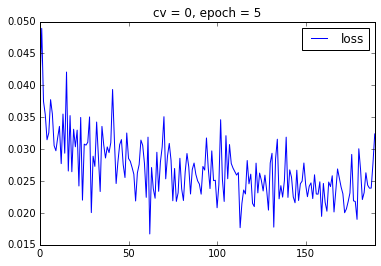

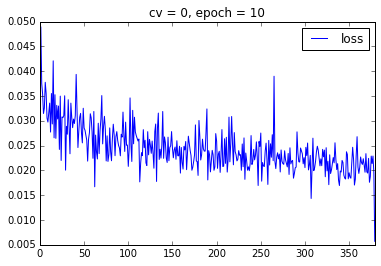

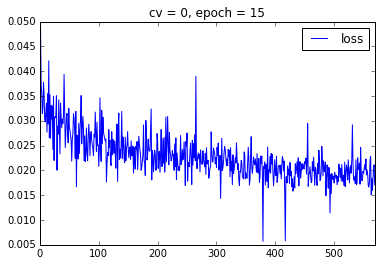

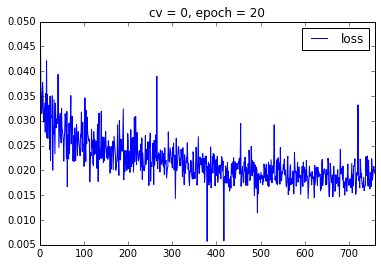

In [92]:
input_size = 6040
hidden_size = 1000
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()
repres = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 20
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s'%(cv,epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch+1, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            


In [96]:
(pred_perf)


{5: (0.53609271523178814, 0.059165215424490457),
 10: (0.52251655629139082, 0.058545004702057382),
 15: (0.47450331125827816, 0.051562257971326186),
 20: (0.4658940397350993, 0.050103770638674189)}

In [97]:
cf_perf

{(5, 'hidden'): (500, (0.38013245033112586, 0.036542147440819579)),
 (5, 'hidden_relu'): (500, (0.5314569536423841, 0.059052200495189854)),
 (5, 'output'): (500, (0.50198675496688738, 0.051223924643020391)),
 (10, 'hidden'): (500, (0.37483443708609276, 0.036682933605008433)),
 (10, 'hidden_relu'): (500, (0.52086092715231791, 0.056198130590135079)),
 (10, 'output'): (500, (0.49536423841059612, 0.051788863220586394)),
 (15, 'hidden'): (500, (0.37450331125827818, 0.036557439862792279)),
 (15, 'hidden_relu'): (500, (0.50728476821192048, 0.053956870718487392)),
 (15, 'output'): (500, (0.49238410596026488, 0.052216553915648653)),
 (20, 'hidden'): (500, (0.36423841059602646, 0.035704290294684159)),
 (20, 'hidden_relu'): (500, (0.49271523178807952, 0.052700347084743075)),
 (20, 'output'): (500, (0.47781456953642387, 0.050117209659197436))}

Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/30], Step [1/38], Loss: 0.0380
Epoch [1/30], Step [2/38], Loss: 0.0420
Epoch [1/30], Step [3/38], Loss: 0.0504
Epoch [1/30], Step [4/38], Loss: 0.0344
Epoch [1/30], Step [5/38], Loss: 0.0387
Epoch [1/30], Step [6/38], Loss: 0.0420
Epoch [1/30], Step [7/38], Loss: 0.0375
Epoch [1/30], Step [8/38], Loss: 0.0352
Epoch [1/30], Step [9/38], Loss: 0.0290
Epoch [1/30], Step [10/38], Loss: 0.0350
Epoch [1/30], Step [11/38], Loss: 0.0355
Epoch [1/30], Step [12/38], Loss: 0.0360
Epoch [1/30], Step [13/38], Loss: 0.0302
Epoch [1/30], Step [14/38], Loss: 0.0323
Epoch [1/30], Step [15/38], Loss: 0.0332
Epoch [1/30], Step [16/38], Loss: 0.0287
Epoch [1/30], Step [17/38], Loss: 0.0308
Epoch [1/30], Step [18/38], Loss: 0.0337
Epoch [1/30], Step [19/38], Loss: 0.0321
Epoch [1/30], Step [20/38], Loss: 0.0323
Epoch [1/30], Step [21/38], Loss: 0.0363
Epoch [1/30], Step [22/38], Loss: 0.0284
Epoch [1/30],

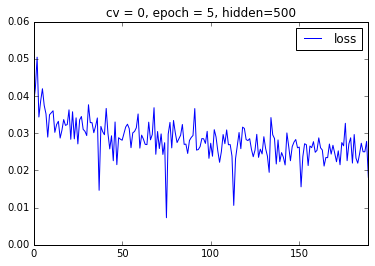

recommendataion on cf_hidden... Epoch 4, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [6/30], Step [1/38], Loss: 0.0244
Epoch [6/30], Step [2/38], Loss: 0.0252
Epoch [6/30], Step [3/38], Loss: 0.0208
Epoch [6/30], Step [4/38], Loss: 0.0258
Epoch [6/30], Step [5/38], Loss: 0.0248
Epoch [6/30], Step [6/38], Loss: 0.0249
Epoch [6/30], Step [7/38], Loss: 0.0218
Epoch [6/30], Step [8/38], Loss: 0.0278
Epoch [6/30], Step [9/38], Loss: 0.0238
Epoch [6/30], Step [10/38], Loss: 0.0266
Epoch [6/30], Step [11/38], Loss: 0.0258
Epoch [6/30], Step [12/38], Loss: 0.0253
Epoch [6/30], Step [13/38], Loss: 0.0245
Epoch [6/30], Step [14/38], Loss: 0.0268
Epoch [6/30], Step [15/38], Loss: 0.0223
Epoch [6/30], Step [16/38], Loss: 0.0271
Epoch [6/30], Step [17/38], Loss: 0.0300
Epoch [6/30], Step [18/38], Loss: 0.0294
Epoch [6/30], Step [19/38], Loss: 0.0195
Epoch [6/30], Step [20/38], Loss: 0.0227
Epoch [6/30], Step [21/38], Loss: 0.0242
Epoch [6/30], Step [22/38], Loss: 0.0219
Epoch [6/30], Step [23/38], Loss: 0.0269
Epoch [6/30], Step [24/38], Loss: 0.0195
Epoch [6/30], Step [25/38

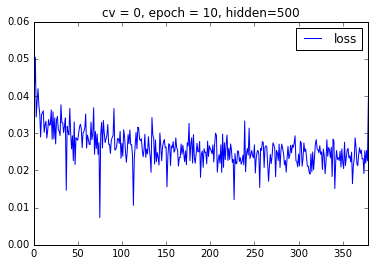

recommendataion on cf_hidden... Epoch 9, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [11/30], Step [1/38], Loss: 0.0198
Epoch [11/30], Step [2/38], Loss: 0.0231
Epoch [11/30], Step [3/38], Loss: 0.0242
Epoch [11/30], Step [4/38], Loss: 0.0213
Epoch [11/30], Step [5/38], Loss: 0.0232
Epoch [11/30], Step [6/38], Loss: 0.0261
Epoch [11/30], Step [7/38], Loss: 0.0245
Epoch [11/30], Step [8/38], Loss: 0.0243
Epoch [11/30], Step [9/38], Loss: 0.0224
Epoch [11/30], Step [10/38], Loss: 0.0239
Epoch [11/30], Step [11/38], Loss: 0.0266
Epoch [11/30], Step [12/38], Loss: 0.0230
Epoch [11/30], Step [13/38], Loss: 0.0228
Epoch [11/30], Step [14/38], Loss: 0.0238
Epoch [11/30], Step [15/38], Loss: 0.0231
Epoch [11/30], Step [16/38], Loss: 0.0205
Epoch [11/30], Step [17/38], Loss: 0.0258
Epoch [11/30], Step [18/38], Loss: 0.0231
Epoch [11/30], Step [19/38], Loss: 0.0244
Epoch [11/30], Step [20/38], Loss: 0.0200
Epoch [11/30], Step [21/38], Loss: 0.0227
Epoch [11/30], Step [22/38], Loss: 0.0239
Epoch [11/30], Step [23/38], Loss: 0.0199
Epoch [11/30], Step [24/38], Loss: 0.0213
E

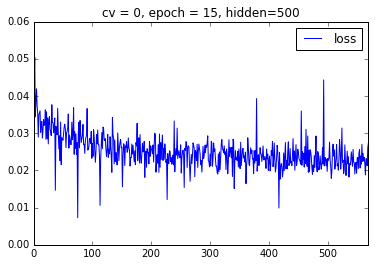

recommendataion on cf_hidden... Epoch 14, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [16/30], Step [1/38], Loss: 0.0244
Epoch [16/30], Step [2/38], Loss: 0.0191
Epoch [16/30], Step [3/38], Loss: 0.0210
Epoch [16/30], Step [4/38], Loss: 0.0194
Epoch [16/30], Step [5/38], Loss: 0.0193
Epoch [16/30], Step [6/38], Loss: 0.0215
Epoch [16/30], Step [7/38], Loss: 0.0181
Epoch [16/30], Step [8/38], Loss: 0.0208
Epoch [16/30], Step [9/38], Loss: 0.0251
Epoch [16/30], Step [10/38], Loss: 0.0262
Epoch [16/30], Step [11/38], Loss: 0.0238
Epoch [16/30], Step [12/38], Loss: 0.0245
Epoch [16/30], Step [13/38], Loss: 0.0237
Epoch [16/30], Step [14/38], Loss: 0.0232
Epoch [16/30], Step [15/38], Loss: 0.0231
Epoch [16/30], Step [16/38], Loss: 0.0222
Epoch [16/30], Step [17/38], Loss: 0.0262
Epoch [16/30], Step [18/38], Loss: 0.0206
Epoch [16/30], Step [19/38], Loss: 0.0207
Epoch [16/30], Step [20/38], Loss: 0.0207
Epoch [16/30], Step [21/38], Loss: 0.0219
Epoch [16/30], Step [22/38], Loss: 0.0223
Epoch [16/30], Step [23/38], Loss: 0.0207
Epoch [16/30], Step [24/38], Loss: 0.0261
E

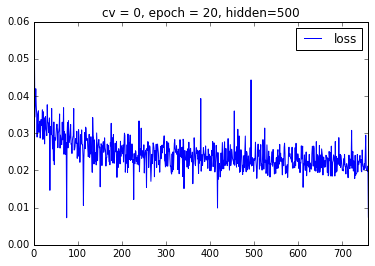

recommendataion on cf_hidden... Epoch 19, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [21/30], Step [1/38], Loss: 0.0219
Epoch [21/30], Step [2/38], Loss: 0.0230
Epoch [21/30], Step [3/38], Loss: 0.0165
Epoch [21/30], Step [4/38], Loss: 0.0250
Epoch [21/30], Step [5/38], Loss: 0.0222
Epoch [21/30], Step [6/38], Loss: 0.0206
Epoch [21/30], Step [7/38], Loss: 0.0224
Epoch [21/30], Step [8/38], Loss: 0.0191
Epoch [21/30], Step [9/38], Loss: 0.0205
Epoch [21/30], Step [10/38], Loss: 0.0200
Epoch [21/30], Step [11/38], Loss: 0.0196
Epoch [21/30], Step [12/38], Loss: 0.0205
Epoch [21/30], Step [13/38], Loss: 0.0217
Epoch [21/30], Step [14/38], Loss: 0.0205
Epoch [21/30], Step [15/38], Loss: 0.0196
Epoch [21/30], Step [16/38], Loss: 0.0230
Epoch [21/30], Step [17/38], Loss: 0.0195
Epoch [21/30], Step [18/38], Loss: 0.0199
Epoch [21/30], Step [19/38], Loss: 0.0208
Epoch [21/30], Step [20/38], Loss: 0.0229
Epoch [21/30], Step [21/38], Loss: 0.0175
Epoch [21/30], Step [22/38], Loss: 0.0211
Epoch [21/30], Step [23/38], Loss: 0.0228
Epoch [21/30], Step [24/38], Loss: 0.0186
E

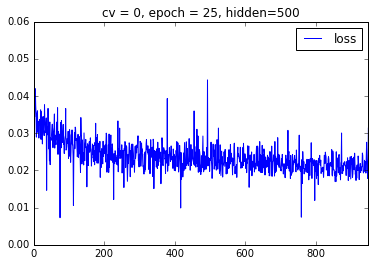

recommendataion on cf_hidden... Epoch 24, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 24, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 24, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [26/30], Step [1/38], Loss: 0.0210
Epoch [26/30], Step [2/38], Loss: 0.0217
Epoch [26/30], Step [3/38], Loss: 0.0183
Epoch [26/30], Step [4/38], Loss: 0.0212
Epoch [26/30], Step [5/38], Loss: 0.0210
Epoch [26/30], Step [6/38], Loss: 0.0233
Epoch [26/30], Step [7/38], Loss: 0.0180
Epoch [26/30], Step [8/38], Loss: 0.0184
Epoch [26/30], Step [9/38], Loss: 0.0169
Epoch [26/30], Step [10/38], Loss: 0.0162
Epoch [26/30], Step [11/38], Loss: 0.0212
Epoch [26/30], Step [12/38], Loss: 0.0225
Epoch [26/30], Step [13/38], Loss: 0.0230
Epoch [26/30], Step [14/38], Loss: 0.0255
Epoch [26/30], Step [15/38], Loss: 0.0236
Epoch [26/30], Step [16/38], Loss: 0.0211
Epoch [26/30], Step [17/38], Loss: 0.0215
Epoch [26/30], Step [18/38], Loss: 0.0196
Epoch [26/30], Step [19/38], Loss: 0.0194
Epoch [26/30], Step [20/38], Loss: 0.0208
Epoch [26/30], Step [21/38], Loss: 0.0227
Epoch [26/30], Step [22/38], Loss: 0.0221
Epoch [26/30], Step [23/38], Loss: 0.0206
Epoch [26/30], Step [24/38], Loss: 0.0209
E

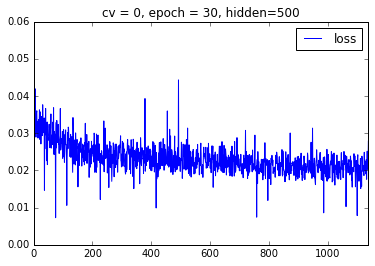

recommendataion on cf_hidden... Epoch 29, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 29, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 29, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

In [107]:
input_size = 6040
hidden_size = 500
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 30
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    repres = dict()
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s, hidden=%s'%(cv,epoch+1,hidden_size))
        plt.show()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        print(pred_perf)
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            
        print(cf_perf)

In [108]:
pred_perf

{5: (0.51026490066225161, 0.051342001281312305),
 10: (0.54370860927152309, 0.060542267988592254),
 15: (0.54635761589403975, 0.063223599830157809),
 20: (0.53841059602649011, 0.062633080074486411),
 25: (0.54403973509933778, 0.062383777572126917),
 30: (0.5473509933774835, 0.064421183216949771)}

In [109]:
cf_perf

{(5, 'hidden'): (500, (0.37350993377483444, 0.034453153244461965)),
 (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)),
 (5, 'output'): (500, (0.45993377483443704, 0.046363422770278884)),
 (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)),
 (10, 'hidden_relu'): (500, (0.4947019867549669, 0.053300359051302725)),
 (10, 'output'): (500, (0.47086092715231787, 0.048047853942243382)),
 (15, 'hidden'): (500, (0.3566225165562914, 0.033101518561752946)),
 (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)),
 (15, 'output'): (500, (0.47615894039735102, 0.050031150933004941)),
 (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)),
 (20, 'hidden_relu'): (500, (0.5245033112582782, 0.058111046619905959)),
 (20, 'output'): (500, (0.50132450331125822, 0.052833670422743596)),
 (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)),
 (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)),
 (25, 'output'): 

continue trainning

Epoch [31/30], Step [1/38], Loss: 0.0193
Epoch [31/30], Step [2/38], Loss: 0.0197
Epoch [31/30], Step [3/38], Loss: 0.0208
Epoch [31/30], Step [4/38], Loss: 0.0204
Epoch [31/30], Step [5/38], Loss: 0.0203
Epoch [31/30], Step [6/38], Loss: 0.0214
Epoch [31/30], Step [7/38], Loss: 0.0214
Epoch [31/30], Step [8/38], Loss: 0.0197
Epoch [31/30], Step [9/38], Loss: 0.0213
Epoch [31/30], Step [10/38], Loss: 0.0187
Epoch [31/30], Step [11/38], Loss: 0.0162
Epoch [31/30], Step [12/38], Loss: 0.0204
Epoch [31/30], Step [13/38], Loss: 0.0213
Epoch [31/30], Step [14/38], Loss: 0.0218
Epoch [31/30], Step [15/38], Loss: 0.0235
Epoch [31/30], Step [16/38], Loss: 0.0210
Epoch [31/30], Step [17/38], Loss: 0.0213
Epoch [31/30], Step [18/38], Loss: 0.0226
Epoch [31/30], Step [19/38], Loss: 0.0238
Epoch [31/30], Step [20/38], Loss: 0.0229
Epoch [31/30], Step [21/38], Loss: 0.0185
Epoch [31/30], Step [22/38], Loss: 0.0179
Epoch [31/30], Step [23/38], Loss: 0.0251
Epoch [31/30], Step [24/38], Loss: 0.0208
E

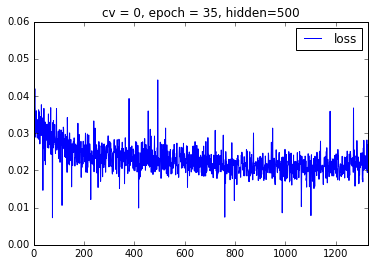

recommendataion on prediction... Epoch 35
{35: (0.50529801324503321, 0.056601353650467784), 5: (0.51026490066225161, 0.051342001281312305), 10: (0.54370860927152309, 0.060542267988592254), 15: (0.54635761589403975, 0.063223599830157809), 20: (0.53841059602649011, 0.062633080074486411), 25: (0.54403973509933778, 0.062383777572126917), 30: (0.5473509933774835, 0.064421183216949771)}
recommendataion on cf_hidden... Epoch 34, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 34, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 34, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

{(20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)), (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)), (30, 'hidden'): (500, (0.34933774834437087, 0.033072494569692322)), (20, 'output'): (500, (0.50132450331125822, 0.052833670422743596)), (20, 'hidden_relu'): (500, (0.5245033112582782, 0.058111046619905959)), (35, 'hidden_relu'): (500, (0.50099337748344375, 0.053806154780280953)), (15, 'output'): (500, (0.47615894039735102, 0.050031150933004941)), (25, 'output'): (500, (0.50264900662251655, 0.054463584960025999)), (10, 'output'): (500, (0.47086092715231787, 0.048047853942243382)), (30, 'hidden_relu'): (500, (0.51953642384105958, 0.059446481011963904)), (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)), (5, 'output'): (500, (0.45993377483443704, 0.046363422770278884)), (35, 'output'): (500, (0.47384105960264911, 0.048816947022263413)), (5, 'hidden'): (500, (0.37350993377483444, 0.034453153244461965)), (10, 'hidden'): (500, (0.370529

Epoch [40/30], Step [11/38], Loss: 0.0215
Epoch [40/30], Step [12/38], Loss: 0.0198
Epoch [40/30], Step [13/38], Loss: 0.0213
Epoch [40/30], Step [14/38], Loss: 0.0209
Epoch [40/30], Step [15/38], Loss: 0.0190
Epoch [40/30], Step [16/38], Loss: 0.0177
Epoch [40/30], Step [17/38], Loss: 0.0225
Epoch [40/30], Step [18/38], Loss: 0.0230
Epoch [40/30], Step [19/38], Loss: 0.0249
Epoch [40/30], Step [20/38], Loss: 0.0220
Epoch [40/30], Step [21/38], Loss: 0.0194
Epoch [40/30], Step [22/38], Loss: 0.0239
Epoch [40/30], Step [23/38], Loss: 0.0198
Epoch [40/30], Step [24/38], Loss: 0.0222
Epoch [40/30], Step [25/38], Loss: 0.0182
Epoch [40/30], Step [26/38], Loss: 0.0237
Epoch [40/30], Step [27/38], Loss: 0.0250
Epoch [40/30], Step [28/38], Loss: 0.0185
Epoch [40/30], Step [29/38], Loss: 0.0212
Epoch [40/30], Step [30/38], Loss: 0.0196
Epoch [40/30], Step [31/38], Loss: 0.0283
Epoch [40/30], Step [32/38], Loss: 0.0202
Epoch [40/30], Step [33/38], Loss: 0.0219
Epoch [40/30], Step [34/38], Loss:

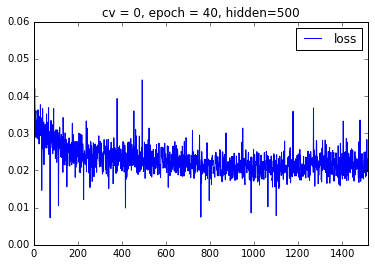

recommendataion on prediction... Epoch 40
{35: (0.50529801324503321, 0.056601353650467784), 5: (0.51026490066225161, 0.051342001281312305), 40: (0.52649006622516559, 0.060531282156656242), 10: (0.54370860927152309, 0.060542267988592254), 15: (0.54635761589403975, 0.063223599830157809), 20: (0.53841059602649011, 0.062633080074486411), 25: (0.54403973509933778, 0.062383777572126917), 30: (0.5473509933774835, 0.064421183216949771)}
recommendataion on cf_hidden... Epoch 39, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 39, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 39, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

{(40, 'output'): (500, (0.48311258278145697, 0.050548455176742051)), (35, 'output'): (500, (0.47384105960264911, 0.048816947022263413)), (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)), (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)), (35, 'hidden'): (500, (0.34172185430463581, 0.03152633243237233)), (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)), (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)), (35, 'hidden_relu'): (500, (0.50099337748344375, 0.053806154780280953)), (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)), (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)), (10, 'output'): (500, (0.47086092715231787, 0.048047853942243382)), (5, 'output'): (500, (0.45993377483443704, 0.046363422770278884)), (10, 'hidden_relu'): (500, (0.4947019867549669, 0.053300359051302725)), (40, 'hidden'): (500, (0.35165562913907283, 0.033328651220309882)), (30, 'hidden'): (500, (0.349

Epoch [45/30], Step [7/38], Loss: 0.0206
Epoch [45/30], Step [8/38], Loss: 0.0253
Epoch [45/30], Step [9/38], Loss: 0.0215
Epoch [45/30], Step [10/38], Loss: 0.0209
Epoch [45/30], Step [11/38], Loss: 0.0195
Epoch [45/30], Step [12/38], Loss: 0.0261
Epoch [45/30], Step [13/38], Loss: 0.0185
Epoch [45/30], Step [14/38], Loss: 0.0193
Epoch [45/30], Step [15/38], Loss: 0.0196
Epoch [45/30], Step [16/38], Loss: 0.0245
Epoch [45/30], Step [17/38], Loss: 0.0192
Epoch [45/30], Step [18/38], Loss: 0.0220
Epoch [45/30], Step [19/38], Loss: 0.0225
Epoch [45/30], Step [20/38], Loss: 0.0187
Epoch [45/30], Step [21/38], Loss: 0.0240
Epoch [45/30], Step [22/38], Loss: 0.0205
Epoch [45/30], Step [23/38], Loss: 0.0195
Epoch [45/30], Step [24/38], Loss: 0.0198
Epoch [45/30], Step [25/38], Loss: 0.0222
Epoch [45/30], Step [26/38], Loss: 0.0191
Epoch [45/30], Step [27/38], Loss: 0.0203
Epoch [45/30], Step [28/38], Loss: 0.0227
Epoch [45/30], Step [29/38], Loss: 0.0162
Epoch [45/30], Step [30/38], Loss: 0.

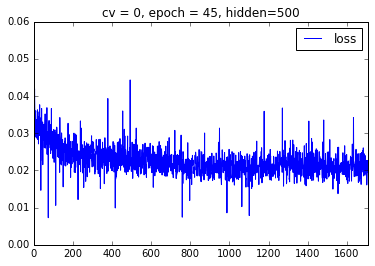

recommendataion on prediction... Epoch 45
{35: (0.50529801324503321, 0.056601353650467784), 5: (0.51026490066225161, 0.051342001281312305), 40: (0.52649006622516559, 0.060531282156656242), 10: (0.54370860927152309, 0.060542267988592254), 45: (0.52582781456953642, 0.060217949826399948), 15: (0.54635761589403975, 0.063223599830157809), 20: (0.53841059602649011, 0.062633080074486411), 25: (0.54403973509933778, 0.062383777572126917), 30: (0.5473509933774835, 0.064421183216949771)}
recommendataion on cf_hidden... Epoch 44, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 44, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 44, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

{(40, 'output'): (500, (0.48311258278145697, 0.050548455176742051)), (45, 'hidden_relu'): (500, (0.50662251655629142, 0.055229109824232681)), (35, 'output'): (500, (0.47384105960264911, 0.048816947022263413)), (45, 'hidden'): (500, (0.35298013245033122, 0.033708649436016216)), (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)), (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)), (35, 'hidden'): (500, (0.34172185430463581, 0.03152633243237233)), (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)), (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)), (35, 'hidden_relu'): (500, (0.50099337748344375, 0.053806154780280953)), (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)), (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)), (10, 'output'): (500, (0.47086092715231787, 0.048047853942243382)), (5, 'output'): (500, (0.45993377483443704, 0.046363422770278884)), (10, 'hidden_relu'): (500, 

Epoch [50/30], Step [1/38], Loss: 0.0206
Epoch [50/30], Step [2/38], Loss: 0.0197
Epoch [50/30], Step [3/38], Loss: 0.0241
Epoch [50/30], Step [4/38], Loss: 0.0162
Epoch [50/30], Step [5/38], Loss: 0.0221
Epoch [50/30], Step [6/38], Loss: 0.0225
Epoch [50/30], Step [7/38], Loss: 0.0167
Epoch [50/30], Step [8/38], Loss: 0.0191
Epoch [50/30], Step [9/38], Loss: 0.0189
Epoch [50/30], Step [10/38], Loss: 0.0203
Epoch [50/30], Step [11/38], Loss: 0.0200
Epoch [50/30], Step [12/38], Loss: 0.0212
Epoch [50/30], Step [13/38], Loss: 0.0179
Epoch [50/30], Step [14/38], Loss: 0.0221
Epoch [50/30], Step [15/38], Loss: 0.0200
Epoch [50/30], Step [16/38], Loss: 0.0205
Epoch [50/30], Step [17/38], Loss: 0.0193
Epoch [50/30], Step [18/38], Loss: 0.0191
Epoch [50/30], Step [19/38], Loss: 0.0190
Epoch [50/30], Step [20/38], Loss: 0.0222
Epoch [50/30], Step [21/38], Loss: 0.0191
Epoch [50/30], Step [22/38], Loss: 0.0186
Epoch [50/30], Step [23/38], Loss: 0.0207
Epoch [50/30], Step [24/38], Loss: 0.0181
E

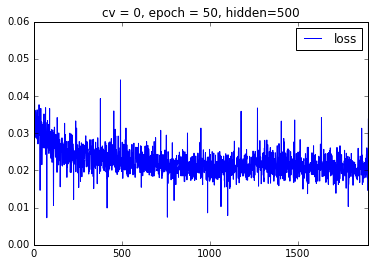

recommendataion on prediction... Epoch 50
{35: (0.50529801324503321, 0.056601353650467784), 5: (0.51026490066225161, 0.051342001281312305), 40: (0.52649006622516559, 0.060531282156656242), 10: (0.54370860927152309, 0.060542267988592254), 45: (0.52582781456953642, 0.060217949826399948), 15: (0.54635761589403975, 0.063223599830157809), 50: (0.5245033112582782, 0.059789486824121954), 20: (0.53841059602649011, 0.062633080074486411), 25: (0.54403973509933778, 0.062383777572126917), 30: (0.5473509933774835, 0.064421183216949771)}
recommendataion on cf_hidden... Epoch 49, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 49, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 49, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

{(40, 'output'): (500, (0.48311258278145697, 0.050548455176742051)), (45, 'hidden_relu'): (500, (0.50662251655629142, 0.055229109824232681)), (35, 'output'): (500, (0.47384105960264911, 0.048816947022263413)), (45, 'hidden'): (500, (0.35298013245033122, 0.033708649436016216)), (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)), (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)), (35, 'hidden'): (500, (0.34172185430463581, 0.03152633243237233)), (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)), (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)), (35, 'hidden_relu'): (500, (0.50099337748344375, 0.053806154780280953)), (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)), (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)), (50, 'hidden_relu'): (500, (0.51423841059602649, 0.056978267470619196)), (10, 'output'): (500, (0.47086092715231787, 0.048047853942243382)), (50, 'hidden'): (500,

Epoch [54/30], Step [35/38], Loss: 0.0215
Epoch [54/30], Step [36/38], Loss: 0.0202
Epoch [54/30], Step [37/38], Loss: 0.0179
Epoch [54/30], Step [38/38], Loss: 0.0130
Epoch [55/30], Step [1/38], Loss: 0.0198
Epoch [55/30], Step [2/38], Loss: 0.0161
Epoch [55/30], Step [3/38], Loss: 0.0194
Epoch [55/30], Step [4/38], Loss: 0.0195
Epoch [55/30], Step [5/38], Loss: 0.0187
Epoch [55/30], Step [6/38], Loss: 0.0204
Epoch [55/30], Step [7/38], Loss: 0.0215
Epoch [55/30], Step [8/38], Loss: 0.0218
Epoch [55/30], Step [9/38], Loss: 0.0193
Epoch [55/30], Step [10/38], Loss: 0.0257
Epoch [55/30], Step [11/38], Loss: 0.0193
Epoch [55/30], Step [12/38], Loss: 0.0168
Epoch [55/30], Step [13/38], Loss: 0.0188
Epoch [55/30], Step [14/38], Loss: 0.0203
Epoch [55/30], Step [15/38], Loss: 0.0192
Epoch [55/30], Step [16/38], Loss: 0.0171
Epoch [55/30], Step [17/38], Loss: 0.0187
Epoch [55/30], Step [18/38], Loss: 0.0214
Epoch [55/30], Step [19/38], Loss: 0.0200
Epoch [55/30], Step [20/38], Loss: 0.0194
E

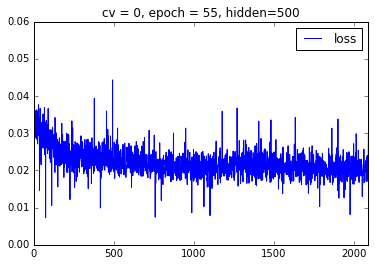

recommendataion on prediction... Epoch 55
{35: (0.50529801324503321, 0.056601353650467784), 5: (0.51026490066225161, 0.051342001281312305), 40: (0.52649006622516559, 0.060531282156656242), 10: (0.54370860927152309, 0.060542267988592254), 45: (0.52582781456953642, 0.060217949826399948), 15: (0.54635761589403975, 0.063223599830157809), 50: (0.5245033112582782, 0.059789486824121954), 20: (0.53841059602649011, 0.062633080074486411), 55: (0.52483443708609268, 0.059913354313298535), 25: (0.54403973509933778, 0.062383777572126917), 30: (0.5473509933774835, 0.064421183216949771)}
recommendataion on cf_hidden... Epoch 54, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 54, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 54, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

{(40, 'output'): (500, (0.48311258278145697, 0.050548455176742051)), (45, 'hidden_relu'): (500, (0.50662251655629142, 0.055229109824232681)), (35, 'output'): (500, (0.47384105960264911, 0.048816947022263413)), (55, 'hidden_relu'): (500, (0.51258278145695368, 0.057069193322017688)), (45, 'hidden'): (500, (0.35298013245033122, 0.033708649436016216)), (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)), (55, 'hidden'): (500, (0.34602649006622516, 0.033095907985300356)), (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)), (35, 'hidden'): (500, (0.34172185430463581, 0.03152633243237233)), (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)), (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)), (35, 'hidden_relu'): (500, (0.50099337748344375, 0.053806154780280953)), (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)), (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)), (50, 'hidden_relu'): 

Epoch [59/30], Step [29/38], Loss: 0.0226
Epoch [59/30], Step [30/38], Loss: 0.0186
Epoch [59/30], Step [31/38], Loss: 0.0241
Epoch [59/30], Step [32/38], Loss: 0.0183
Epoch [59/30], Step [33/38], Loss: 0.0230
Epoch [59/30], Step [34/38], Loss: 0.0205
Epoch [59/30], Step [35/38], Loss: 0.0226
Epoch [59/30], Step [36/38], Loss: 0.0208
Epoch [59/30], Step [37/38], Loss: 0.0189
Epoch [59/30], Step [38/38], Loss: 0.0191
Epoch [60/30], Step [1/38], Loss: 0.0199
Epoch [60/30], Step [2/38], Loss: 0.0177
Epoch [60/30], Step [3/38], Loss: 0.0154
Epoch [60/30], Step [4/38], Loss: 0.0182
Epoch [60/30], Step [5/38], Loss: 0.0189
Epoch [60/30], Step [6/38], Loss: 0.0220
Epoch [60/30], Step [7/38], Loss: 0.0174
Epoch [60/30], Step [8/38], Loss: 0.0199
Epoch [60/30], Step [9/38], Loss: 0.0160
Epoch [60/30], Step [10/38], Loss: 0.0190
Epoch [60/30], Step [11/38], Loss: 0.0216
Epoch [60/30], Step [12/38], Loss: 0.0183
Epoch [60/30], Step [13/38], Loss: 0.0214
Epoch [60/30], Step [14/38], Loss: 0.0195
E

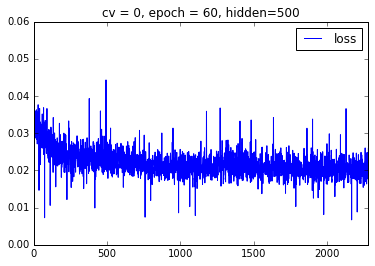

recommendataion on prediction... Epoch 60
{35: (0.50529801324503321, 0.056601353650467784), 5: (0.51026490066225161, 0.051342001281312305), 40: (0.52649006622516559, 0.060531282156656242), 10: (0.54370860927152309, 0.060542267988592254), 45: (0.52582781456953642, 0.060217949826399948), 15: (0.54635761589403975, 0.063223599830157809), 50: (0.5245033112582782, 0.059789486824121954), 20: (0.53841059602649011, 0.062633080074486411), 55: (0.52483443708609268, 0.059913354313298535), 25: (0.54403973509933778, 0.062383777572126917), 60: (0.51059602649006619, 0.057641637042586361), 30: (0.5473509933774835, 0.064421183216949771)}
recommendataion on cf_hidden... Epoch 59, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 59, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 59, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

{(40, 'output'): (500, (0.48311258278145697, 0.050548455176742051)), (45, 'hidden_relu'): (500, (0.50662251655629142, 0.055229109824232681)), (35, 'output'): (500, (0.47384105960264911, 0.048816947022263413)), (55, 'hidden_relu'): (500, (0.51258278145695368, 0.057069193322017688)), (45, 'hidden'): (500, (0.35298013245033122, 0.033708649436016216)), (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)), (55, 'hidden'): (500, (0.34602649006622516, 0.033095907985300356)), (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)), (35, 'hidden'): (500, (0.34172185430463581, 0.03152633243237233)), (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)), (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)), (35, 'hidden_relu'): (500, (0.50099337748344375, 0.053806154780280953)), (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)), (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)), (50, 'hidden_relu'): 

In [110]:

num_epochs = 30
for epoch in range(num_epochs, num_epochs+num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    repres = dict()
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s, hidden=%s'%(cv,epoch+1,hidden_size))
        plt.show()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        for perf_key in pred_perf.keys():
            print(perf_key, pred_perf[perf_key])
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            
        for perf_key in cf_perf.keys():
            print(perf_key, cf_perf[perf_key])


In [120]:
cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train.T, hidden_layers=repres[epoch][key], test=data.test_dataset.test)


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

IndexError: index 3725 is out of bounds for axis 1 with size 3706

In [111]:
pred_perf

{5: (0.51026490066225161, 0.051342001281312305),
 10: (0.54370860927152309, 0.060542267988592254),
 15: (0.54635761589403975, 0.063223599830157809),
 20: (0.53841059602649011, 0.062633080074486411),
 25: (0.54403973509933778, 0.062383777572126917),
 30: (0.5473509933774835, 0.064421183216949771),
 35: (0.50529801324503321, 0.056601353650467784),
 40: (0.52649006622516559, 0.060531282156656242),
 45: (0.52582781456953642, 0.060217949826399948),
 50: (0.5245033112582782, 0.059789486824121954),
 55: (0.52483443708609268, 0.059913354313298535),
 60: (0.51059602649006619, 0.057641637042586361)}

In [112]:
cf_perf

{(5, 'hidden'): (500, (0.37350993377483444, 0.034453153244461965)),
 (5, 'hidden_relu'): (500, (0.47284768211920536, 0.047326826826638746)),
 (5, 'output'): (500, (0.45993377483443704, 0.046363422770278884)),
 (10, 'hidden'): (500, (0.37052980132450331, 0.035152033590378301)),
 (10, 'hidden_relu'): (500, (0.4947019867549669, 0.053300359051302725)),
 (10, 'output'): (500, (0.47086092715231787, 0.048047853942243382)),
 (15, 'hidden'): (500, (0.3566225165562914, 0.033101518561752946)),
 (15, 'hidden_relu'): (500, (0.50993377483443714, 0.05575437194816097)),
 (15, 'output'): (500, (0.47615894039735102, 0.050031150933004941)),
 (20, 'hidden'): (500, (0.34834437086092712, 0.032423742671510776)),
 (20, 'hidden_relu'): (500, (0.5245033112582782, 0.058111046619905959)),
 (20, 'output'): (500, (0.50132450331125822, 0.052833670422743596)),
 (25, 'hidden'): (500, (0.35728476821192057, 0.035345271381385539)),
 (25, 'hidden_relu'): (500, (0.5158940397350994, 0.058802887916278399)),
 (25, 'output'): 

Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/60], Step [1/38], Loss: 0.0497
Epoch [1/60], Step [2/38], Loss: 0.0431
Epoch [1/60], Step [3/38], Loss: 0.0465
Epoch [1/60], Step [4/38], Loss: 0.0432
Epoch [1/60], Step [5/38], Loss: 0.0457
Epoch [1/60], Step [6/38], Loss: 0.0434
Epoch [1/60], Step [7/38], Loss: 0.0434
Epoch [1/60], Step [8/38], Loss: 0.0380
Epoch [1/60], Step [9/38], Loss: 0.0330
Epoch [1/60], Step [10/38], Loss: 0.0435
Epoch [1/60], Step [11/38], Loss: 0.0372
Epoch [1/60], Step [12/38], Loss: 0.0364
Epoch [1/60], Step [13/38], Loss: 0.0314
Epoch [1/60], Step [14/38], Loss: 0.0280
Epoch [1/60], Step [15/38], Loss: 0.0331
Epoch [1/60], Step [16/38], Loss: 0.0296
Epoch [1/60], Step [17/38], Loss: 0.0387
Epoch [1/60], Step [18/38], Loss: 0.0331
Epoch [1/60], Step [19/38], Loss: 0.0378
Epoch [1/60], Step [20/38], Loss: 0.0336
Epoch [1/60], Step [21/38], Loss: 0.0378
Epoch [1/60], Step [22/38], Loss: 0.0337
Epoch [1/60],

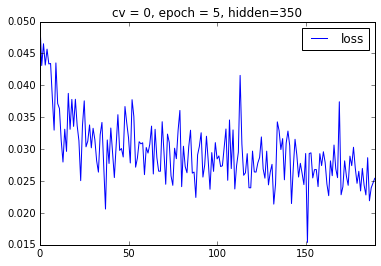

recommendataion on prediction... Epoch 5
5 (0.50662251655629142, 0.050159214746128909)
recommendataion on cf_hidden... Epoch 5, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 5, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 5, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
Epoch [6/60], Step [1/38], Loss: 0.0212
Epoch [6/60], Step [2/38], Loss: 0.0266
Epoch [6/60], Step [3/38], Loss: 0.0292
Epoch [6/60], Step [4/38], Loss: 0.0294
Epoch [6/60], Step [5/38], Loss: 0.0269
Epoch [6/60], Step [6/38], Loss: 0.0274
Epoch [6/60], Step [7/38], Loss: 0.0302
Epoch [6/60], Step [8/38], Loss: 0.0230
Epoch [6/60], Step [9/38], Loss: 0.0248
Epoch [6/60], Step [10/38], Loss: 0.0196
Epoch [6/60], Step [11/38], Loss: 0.0307
Epoch [6/60], Step [12/38], Loss: 0.0244
Epoch [6/60], Step [13/38], Loss: 0.0248
Epoch [6/60], Step [14/38], Loss: 0.0223
Epoch [6/60], Step [15/38], Loss: 0.0236
Epoch [6/60], Step [16/38], Loss: 0.0280
Epoch [6/60], Step [17/38], Loss: 0.0280
Epoch [6/60], Step [18/38], Loss: 0.0293
Epoch [6/60], Step [19/38], Loss: 0.0286
Epoch [6/60], Step [20/38], Los

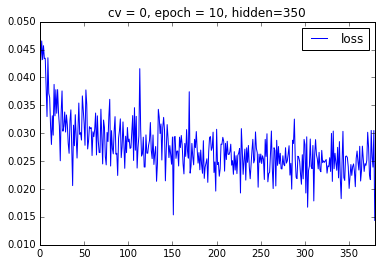

recommendataion on prediction... Epoch 10
10 (0.54503311258278142, 0.060977679785563142)
5 (0.50662251655629142, 0.050159214746128909)
recommendataion on cf_hidden... Epoch 10, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 10, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 10, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(10, 'hidden_relu') (500, (0.49304635761589405, 0.052592450682678614))
Epoch [11/60], Step [1/38], Loss: 0.0244
Epoch [11/60], Step [2/38], Loss: 0.0256
Epoch [11/60], Step [3/38], Loss: 0.0209
Epoch [11/60], Step [4/38], Loss: 0.0201
Epoch [11/60], Step [5/38], Loss: 0.0254
Epoch [11/60], Step [6/38], Loss: 0.0242
Epoch [11/60], Step [7/38], Loss: 0.0182
Epoch [11/60], Step [8/38], Loss: 0.0212
Epoch [11/60], Step [9/38], Loss: 0.0226
Epoch [11/60], Step [10/38], Loss: 0.0283
Epoch [11/60], Step [11/38], Loss: 0.0231
Epoch [11/60], Step [12/38], Loss: 0.0214
Epoch [11/60], Step [13/38], Loss: 0.0296
Epoch [11/60], Step [14/38], Loss: 0.0201
Epoch [11/60], Step

Epoch [15/60], Step [37/38], Loss: 0.0227
Epoch [15/60], Step [38/38], Loss: 0.0330


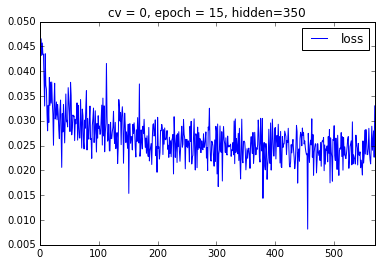

recommendataion on prediction... Epoch 15
10 (0.54503311258278142, 0.060977679785563142)
5 (0.50662251655629142, 0.050159214746128909)
15 (0.57615894039735094, 0.065892199177316993)
recommendataion on cf_hidden... Epoch 15, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 15, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 15, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(15, 'output') (500, (0.49569536423841054, 0.052054485689400992))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(10, 'hidden_relu') (500, (0.49304635761589405, 0.052592450682678614))
(15, 'hidden') (500, (0.35264900662251658, 0.033164004440998159))
Epoch [16/60], Step [1/38], Loss: 0.0249
Epoch [16/60], Step [2/38], Loss: 0.0231
Epoch [16/60], Step [3/38], Loss: 0.0243
Epoch [16/60], Step [4/38], Loss: 0.0261
Epoch [16/60], Step [5/38], Loss: 0.0236
Epoch [16/60], Step [6/38], Loss: 0.0232
Epoch [16/60], Step [7/38], Loss: 0.0243
Epoch [16/60], Step [8/38], Loss: 0.0227
Epoch [16/60], Step [9/38], Loss: 0.0300
Epoch [16/60], Step [10/38

Epoch [20/60], Step [31/38], Loss: 0.0259
Epoch [20/60], Step [32/38], Loss: 0.0257
Epoch [20/60], Step [33/38], Loss: 0.0253
Epoch [20/60], Step [34/38], Loss: 0.0229
Epoch [20/60], Step [35/38], Loss: 0.0264
Epoch [20/60], Step [36/38], Loss: 0.0252
Epoch [20/60], Step [37/38], Loss: 0.0232
Epoch [20/60], Step [38/38], Loss: 0.0296


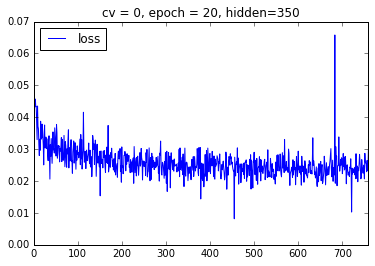

recommendataion on prediction... Epoch 20
10 (0.54503311258278142, 0.060977679785563142)
20 (0.56357615894039736, 0.064149662680271932)
5 (0.50662251655629142, 0.050159214746128909)
15 (0.57615894039735094, 0.065892199177316993)
recommendataion on cf_hidden... Epoch 20, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 20, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 20, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(20, 'output') (500, (0.48774834437086095, 0.051286442045806638))
(20, 'hidden_relu') (500, (0.5, 0.055048802214054941))
(15, 'output') (500, (0.49569536423841054, 0.052054485689400992))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(10, 'hidden_relu') (500, (0.49304635761589405, 0.052592450682678614))
(15, 'hidden') (500, (0.35264900662251658, 0.033164004440998159))
Epoch [21/60], Step [1/38], Loss: 0.0203
Epoch [21/60], Step [2/38], Loss: 0.0238
Epoch [21/60], Step [3/38], Loss: 0.0212
Epoch [21/60], Step [4/38], Loss: 0.0231
Epoch [21/60], Step [5/38], Loss: 0.0227
Epo

Epoch [25/60], Step [27/38], Loss: 0.0245
Epoch [25/60], Step [28/38], Loss: 0.0243
Epoch [25/60], Step [29/38], Loss: 0.0235
Epoch [25/60], Step [30/38], Loss: 0.0225
Epoch [25/60], Step [31/38], Loss: 0.0260
Epoch [25/60], Step [32/38], Loss: 0.0210
Epoch [25/60], Step [33/38], Loss: 0.0227
Epoch [25/60], Step [34/38], Loss: 0.0248
Epoch [25/60], Step [35/38], Loss: 0.0220
Epoch [25/60], Step [36/38], Loss: 0.0203
Epoch [25/60], Step [37/38], Loss: 0.0219
Epoch [25/60], Step [38/38], Loss: 0.0136


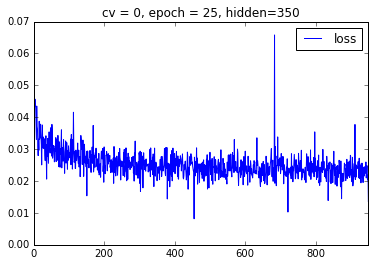

recommendataion on prediction... Epoch 25
25 (0.57417218543046356, 0.066220148243747445)
10 (0.54503311258278142, 0.060977679785563142)
20 (0.56357615894039736, 0.064149662680271932)
5 (0.50662251655629142, 0.050159214746128909)
15 (0.57615894039735094, 0.065892199177316993)
recommendataion on cf_hidden... Epoch 25, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 25, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 25, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(20, 'output') (500, (0.48774834437086095, 0.051286442045806638))
(20, 'hidden_relu') (500, (0.5, 0.055048802214054941))
(15, 'output') (500, (0.49569536423841054, 0.052054485689400992))
(25, 'output') (500, (0.50496688741721851, 0.05414938703509041))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(10, 'hidden_relu') (500, (0.49304635761589405, 0.052592450682678614))
(25, 'hidden_relu') (500, (0.51622516556291398, 0.056155411786801203))
(15, 'hidden') (500, (0.35264900662251658, 0.033164004440998159))
Epoch 

Epoch [30/60], Step [23/38], Loss: 0.0216
Epoch [30/60], Step [24/38], Loss: 0.0248
Epoch [30/60], Step [25/38], Loss: 0.0248
Epoch [30/60], Step [26/38], Loss: 0.0224
Epoch [30/60], Step [27/38], Loss: 0.0268
Epoch [30/60], Step [28/38], Loss: 0.0246
Epoch [30/60], Step [29/38], Loss: 0.0240
Epoch [30/60], Step [30/38], Loss: 0.0225
Epoch [30/60], Step [31/38], Loss: 0.0209
Epoch [30/60], Step [32/38], Loss: 0.0232
Epoch [30/60], Step [33/38], Loss: 0.0235
Epoch [30/60], Step [34/38], Loss: 0.0210
Epoch [30/60], Step [35/38], Loss: 0.0208
Epoch [30/60], Step [36/38], Loss: 0.0185
Epoch [30/60], Step [37/38], Loss: 0.0231
Epoch [30/60], Step [38/38], Loss: 0.0201


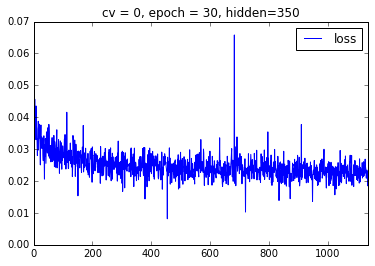

recommendataion on prediction... Epoch 30
5 (0.50662251655629142, 0.050159214746128909)
10 (0.54503311258278142, 0.060977679785563142)
15 (0.57615894039735094, 0.065892199177316993)
20 (0.56357615894039736, 0.064149662680271932)
25 (0.57417218543046356, 0.066220148243747445)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 30, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 30, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 30, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(30, 'hidden') (500, (0.36092715231788081, 0.036065835809018107))
(20, 'output') (500, (0.48774834437086095, 0.051286442045806638))
(20, 'hidden_relu') (500, (0.5, 0.055048802214054941))
(15, 'output') (500, (0.49569536423841054, 0.052054485689400992))
(25, 'output') (500, (0.50496688741721851, 0.05414938703509041))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(30, 'hidden_relu') (500, (0.51920529801324511, 0.05729431323986383))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(30, 'output') (500, (0.50033112582781469, 0.054225139841896634))
(10, 'hidden

Epoch [35/60], Step [17/38], Loss: 0.0210
Epoch [35/60], Step [18/38], Loss: 0.0259
Epoch [35/60], Step [19/38], Loss: 0.0229
Epoch [35/60], Step [20/38], Loss: 0.0282
Epoch [35/60], Step [21/38], Loss: 0.0203
Epoch [35/60], Step [22/38], Loss: 0.0256
Epoch [35/60], Step [23/38], Loss: 0.0216
Epoch [35/60], Step [24/38], Loss: 0.0253
Epoch [35/60], Step [25/38], Loss: 0.0234
Epoch [35/60], Step [26/38], Loss: 0.0203
Epoch [35/60], Step [27/38], Loss: 0.0207
Epoch [35/60], Step [28/38], Loss: 0.0178
Epoch [35/60], Step [29/38], Loss: 0.0223
Epoch [35/60], Step [30/38], Loss: 0.0222
Epoch [35/60], Step [31/38], Loss: 0.0215
Epoch [35/60], Step [32/38], Loss: 0.0213
Epoch [35/60], Step [33/38], Loss: 0.0235
Epoch [35/60], Step [34/38], Loss: 0.0241
Epoch [35/60], Step [35/38], Loss: 0.0215
Epoch [35/60], Step [36/38], Loss: 0.0210
Epoch [35/60], Step [37/38], Loss: 0.0221
Epoch [35/60], Step [38/38], Loss: 0.0112


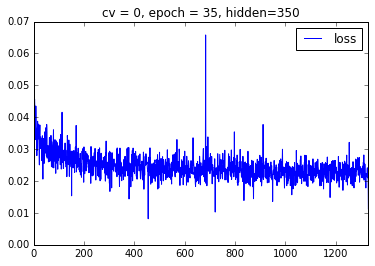

recommendataion on prediction... Epoch 35
35 (0.5715231788079469, 0.066103509214202008)
5 (0.50662251655629142, 0.050159214746128909)
10 (0.54503311258278142, 0.060977679785563142)
15 (0.57615894039735094, 0.065892199177316993)
20 (0.56357615894039736, 0.064149662680271932)
25 (0.57417218543046356, 0.066220148243747445)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 35, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 35, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 35, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(30, 'hidden') (500, (0.36092715231788081, 0.036065835809018107))
(20, 'output') (500, (0.48774834437086095, 0.051286442045806638))
(20, 'hidden_relu') (500, (0.5, 0.055048802214054941))
(35, 'hidden_relu') (500, (0.51456953642384096, 0.057994493377204463))
(15, 'output') (500, (0.49569536423841054, 0.052054485689400992))
(25, 'output') (500, (0.50496688741721851, 0.05414938703509041))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(30, 'hidden_relu') (500, (0.51920529801324511, 0.05729431323986383))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(35, 'output') (500, (0.49933774834437089, 0.052872321614677413))
(5, 'hidden') (500, (0.35529801324503313, 0.034033844805558613))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(5, 'hidde

Epoch [40/60], Step [13/38], Loss: 0.0176
Epoch [40/60], Step [14/38], Loss: 0.0254
Epoch [40/60], Step [15/38], Loss: 0.0256
Epoch [40/60], Step [16/38], Loss: 0.0233
Epoch [40/60], Step [17/38], Loss: 0.0203
Epoch [40/60], Step [18/38], Loss: 0.0273
Epoch [40/60], Step [19/38], Loss: 0.0224
Epoch [40/60], Step [20/38], Loss: 0.0241
Epoch [40/60], Step [21/38], Loss: 0.0236
Epoch [40/60], Step [22/38], Loss: 0.0264
Epoch [40/60], Step [23/38], Loss: 0.0228
Epoch [40/60], Step [24/38], Loss: 0.0216
Epoch [40/60], Step [25/38], Loss: 0.0196
Epoch [40/60], Step [26/38], Loss: 0.0222
Epoch [40/60], Step [27/38], Loss: 0.0252
Epoch [40/60], Step [28/38], Loss: 0.0232
Epoch [40/60], Step [29/38], Loss: 0.0225
Epoch [40/60], Step [30/38], Loss: 0.0207
Epoch [40/60], Step [31/38], Loss: 0.0223
Epoch [40/60], Step [32/38], Loss: 0.0255
Epoch [40/60], Step [33/38], Loss: 0.0214
Epoch [40/60], Step [34/38], Loss: 0.0239
Epoch [40/60], Step [35/38], Loss: 0.0257
Epoch [40/60], Step [36/38], Loss:

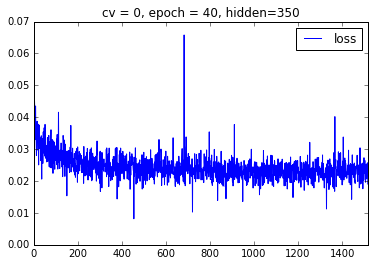

recommendataion on prediction... Epoch 40
35 (0.5715231788079469, 0.066103509214202008)
5 (0.50662251655629142, 0.050159214746128909)
40 (0.55231788079470201, 0.061018408558721086)
10 (0.54503311258278142, 0.060977679785563142)
15 (0.57615894039735094, 0.065892199177316993)
20 (0.56357615894039736, 0.064149662680271932)
25 (0.57417218543046356, 0.066220148243747445)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 40, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 40, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 40, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(40, 'output') (500, (0.49602649006622518, 0.052863630717032838))
(35, 'output') (500, (0.49933774834437089, 0.052872321614677413))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(35, 'hidden') (500, (0.352317880794702, 0.03409929180154006))
(25, 'hidden_relu') (500, (0.51622516556291398, 0.056155411786801203))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(35, 'hidden_relu') (500, (0.51456953642384096, 0.057994493377204463))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(10, 'hidden_relu') (500, (0.49304635761589405, 0.052592450682678614))
(40, 'hidden') (500, (0.34602649006622516, 0.034628303959787041))
(30, 'hidden') (500, (0.36092715231788081, 0.036065835809

Epoch [45/60], Step [7/38], Loss: 0.0219
Epoch [45/60], Step [8/38], Loss: 0.0222
Epoch [45/60], Step [9/38], Loss: 0.0241
Epoch [45/60], Step [10/38], Loss: 0.0268
Epoch [45/60], Step [11/38], Loss: 0.0252
Epoch [45/60], Step [12/38], Loss: 0.0287
Epoch [45/60], Step [13/38], Loss: 0.0286
Epoch [45/60], Step [14/38], Loss: 0.0209
Epoch [45/60], Step [15/38], Loss: 0.0196
Epoch [45/60], Step [16/38], Loss: 0.0232
Epoch [45/60], Step [17/38], Loss: 0.0232
Epoch [45/60], Step [18/38], Loss: 0.0485
Epoch [45/60], Step [19/38], Loss: 0.0246
Epoch [45/60], Step [20/38], Loss: 0.0237
Epoch [45/60], Step [21/38], Loss: 0.0261
Epoch [45/60], Step [22/38], Loss: 0.0227
Epoch [45/60], Step [23/38], Loss: 0.0296
Epoch [45/60], Step [24/38], Loss: 0.0259
Epoch [45/60], Step [25/38], Loss: 0.0190
Epoch [45/60], Step [26/38], Loss: 0.0270
Epoch [45/60], Step [27/38], Loss: 0.0258
Epoch [45/60], Step [28/38], Loss: 0.0199
Epoch [45/60], Step [29/38], Loss: 0.0245
Epoch [45/60], Step [30/38], Loss: 0.

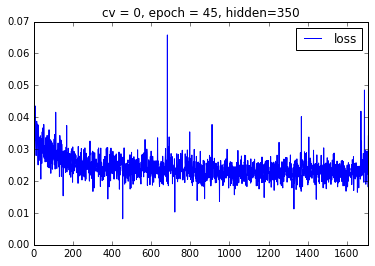

recommendataion on prediction... Epoch 45
35 (0.5715231788079469, 0.066103509214202008)
5 (0.50662251655629142, 0.050159214746128909)
40 (0.55231788079470201, 0.061018408558721086)
10 (0.54503311258278142, 0.060977679785563142)
45 (0.52384105960264893, 0.057372101356715485)
15 (0.57615894039735094, 0.065892199177316993)
20 (0.56357615894039736, 0.064149662680271932)
25 (0.57417218543046356, 0.066220148243747445)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 45, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 45, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 45, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(40, 'output') (500, (0.49602649006622518, 0.052863630717032838))
(45, 'hidden_relu') (500, (0.48476821192052982, 0.051601864932614691))
(35, 'output') (500, (0.49933774834437089, 0.052872321614677413))
(45, 'hidden') (500, (0.35331125827814569, 0.034475792848560338))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(35, 'hidden') (500, (0.352317880794702, 0.03409929180154006))
(25, 'hidden_relu') (500, (0.51622516556291398, 0.056155411786801203))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(35, 'hidden_relu') (500, (0.51456953642384096, 0.057994493377204463))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(5, 'output') (500, (0.44900662251655638, 0.045168552214996716))
(10, 'hidden_relu') (500, (0.49304635761589405, 0.0525924

Epoch [50/60], Step [3/38], Loss: 0.0206
Epoch [50/60], Step [4/38], Loss: 0.0212
Epoch [50/60], Step [5/38], Loss: 0.0231
Epoch [50/60], Step [6/38], Loss: 0.0241
Epoch [50/60], Step [7/38], Loss: 0.0189
Epoch [50/60], Step [8/38], Loss: 0.0208
Epoch [50/60], Step [9/38], Loss: 0.0215
Epoch [50/60], Step [10/38], Loss: 0.0246
Epoch [50/60], Step [11/38], Loss: 0.0255
Epoch [50/60], Step [12/38], Loss: 0.0224
Epoch [50/60], Step [13/38], Loss: 0.0220
Epoch [50/60], Step [14/38], Loss: 0.0213
Epoch [50/60], Step [15/38], Loss: 0.0249
Epoch [50/60], Step [16/38], Loss: 0.0275
Epoch [50/60], Step [17/38], Loss: 0.0253
Epoch [50/60], Step [18/38], Loss: 0.0222
Epoch [50/60], Step [19/38], Loss: 0.0167
Epoch [50/60], Step [20/38], Loss: 0.0212
Epoch [50/60], Step [21/38], Loss: 0.0207
Epoch [50/60], Step [22/38], Loss: 0.0230
Epoch [50/60], Step [23/38], Loss: 0.0251
Epoch [50/60], Step [24/38], Loss: 0.0248
Epoch [50/60], Step [25/38], Loss: 0.0222
Epoch [50/60], Step [26/38], Loss: 0.0262

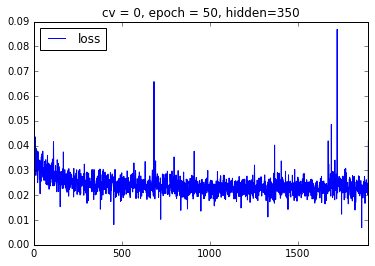

recommendataion on prediction... Epoch 50
35 (0.5715231788079469, 0.066103509214202008)
5 (0.50662251655629142, 0.050159214746128909)
40 (0.55231788079470201, 0.061018408558721086)
10 (0.54503311258278142, 0.060977679785563142)
45 (0.52384105960264893, 0.057372101356715485)
15 (0.57615894039735094, 0.065892199177316993)
50 (0.55430463576158939, 0.062708639337895319)
20 (0.56357615894039736, 0.064149662680271932)
25 (0.57417218543046356, 0.066220148243747445)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 50, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 50, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 50, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(40, 'output') (500, (0.49602649006622518, 0.052863630717032838))
(45, 'hidden_relu') (500, (0.48476821192052982, 0.051601864932614691))
(35, 'output') (500, (0.49933774834437089, 0.052872321614677413))
(45, 'hidden') (500, (0.35331125827814569, 0.034475792848560338))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(35, 'hidden') (500, (0.352317880794702, 0.03409929180154006))
(25, 'hidden_relu') (500, (0.51622516556291398, 0.056155411786801203))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(35, 'hidden_relu') (500, (0.51456953642384096, 0.057994493377204463))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(50, 'hidden_relu') (500, (0.50132450331125822, 0.056616936251225207))
(10, 'output') (500, (0.48841059602649006, 0.050194801055485891))
(50, 'hidden') (500, (0.34635761589403974, 0.034718

Epoch [54/60], Step [37/38], Loss: 0.0238
Epoch [54/60], Step [38/38], Loss: 0.0048
Epoch [55/60], Step [1/38], Loss: 0.0251
Epoch [55/60], Step [2/38], Loss: 0.0231
Epoch [55/60], Step [3/38], Loss: 0.0189
Epoch [55/60], Step [4/38], Loss: 0.0188
Epoch [55/60], Step [5/38], Loss: 0.0216
Epoch [55/60], Step [6/38], Loss: 0.0173
Epoch [55/60], Step [7/38], Loss: 0.0235
Epoch [55/60], Step [8/38], Loss: 0.0208
Epoch [55/60], Step [9/38], Loss: 0.0244
Epoch [55/60], Step [10/38], Loss: 0.0185
Epoch [55/60], Step [11/38], Loss: 0.0209
Epoch [55/60], Step [12/38], Loss: 0.0230
Epoch [55/60], Step [13/38], Loss: 0.0219
Epoch [55/60], Step [14/38], Loss: 0.0241
Epoch [55/60], Step [15/38], Loss: 0.0173
Epoch [55/60], Step [16/38], Loss: 0.0253
Epoch [55/60], Step [17/38], Loss: 0.0225
Epoch [55/60], Step [18/38], Loss: 0.0240
Epoch [55/60], Step [19/38], Loss: 0.0196
Epoch [55/60], Step [20/38], Loss: 0.0283
Epoch [55/60], Step [21/38], Loss: 0.0213
Epoch [55/60], Step [22/38], Loss: 0.0255
E

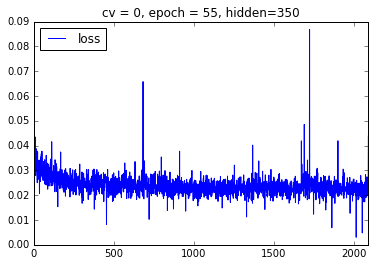

recommendataion on prediction... Epoch 55
35 (0.5715231788079469, 0.066103509214202008)
5 (0.50662251655629142, 0.050159214746128909)
40 (0.55231788079470201, 0.061018408558721086)
10 (0.54503311258278142, 0.060977679785563142)
45 (0.52384105960264893, 0.057372101356715485)
15 (0.57615894039735094, 0.065892199177316993)
50 (0.55430463576158939, 0.062708639337895319)
20 (0.56357615894039736, 0.064149662680271932)
55 (0.56887417218543046, 0.064780580291039905)
25 (0.57417218543046356, 0.066220148243747445)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 55, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 55, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 55, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(40, 'output') (500, (0.49602649006622518, 0.052863630717032838))
(45, 'hidden_relu') (500, (0.48476821192052982, 0.051601864932614691))
(35, 'output') (500, (0.49933774834437089, 0.052872321614677413))
(55, 'hidden_relu') (500, (0.50231788079470197, 0.056175595244072743))
(45, 'hidden') (500, (0.35331125827814569, 0.034475792848560338))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(55, 'hidden') (500, (0.34966887417218545, 0.035098921409456973))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(35, 'hidden') (500, (0.352317880794702, 0.03409929180154006))
(25, 'hidden_relu') (500, (0.51622516556291398, 0.056155411786801203))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(35, 'hidden_relu') (500, (0.51456953642384096, 0.057994493377204463))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(50, 'hidden_relu') (500, (0.50132450331125822, 0.0

Epoch [59/60], Step [31/38], Loss: 0.0210
Epoch [59/60], Step [32/38], Loss: 0.0294
Epoch [59/60], Step [33/38], Loss: 0.0254
Epoch [59/60], Step [34/38], Loss: 0.0266
Epoch [59/60], Step [35/38], Loss: 0.0214
Epoch [59/60], Step [36/38], Loss: 0.0207
Epoch [59/60], Step [37/38], Loss: 0.0245
Epoch [59/60], Step [38/38], Loss: 0.0323
Epoch [60/60], Step [1/38], Loss: 0.0227
Epoch [60/60], Step [2/38], Loss: 0.0259
Epoch [60/60], Step [3/38], Loss: 0.0198
Epoch [60/60], Step [4/38], Loss: 0.0262
Epoch [60/60], Step [5/38], Loss: 0.0231
Epoch [60/60], Step [6/38], Loss: 0.0246
Epoch [60/60], Step [7/38], Loss: 0.0225
Epoch [60/60], Step [8/38], Loss: 0.0234
Epoch [60/60], Step [9/38], Loss: 0.0194
Epoch [60/60], Step [10/38], Loss: 0.0215
Epoch [60/60], Step [11/38], Loss: 0.0242
Epoch [60/60], Step [12/38], Loss: 0.0241
Epoch [60/60], Step [13/38], Loss: 0.0214
Epoch [60/60], Step [14/38], Loss: 0.0230
Epoch [60/60], Step [15/38], Loss: 0.0212
Epoch [60/60], Step [16/38], Loss: 0.0219
E

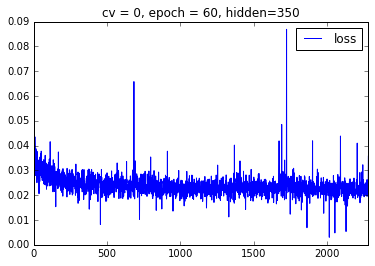

recommendataion on prediction... Epoch 60
35 (0.5715231788079469, 0.066103509214202008)
5 (0.50662251655629142, 0.050159214746128909)
40 (0.55231788079470201, 0.061018408558721086)
10 (0.54503311258278142, 0.060977679785563142)
45 (0.52384105960264893, 0.057372101356715485)
15 (0.57615894039735094, 0.065892199177316993)
50 (0.55430463576158939, 0.062708639337895319)
20 (0.56357615894039736, 0.064149662680271932)
55 (0.56887417218543046, 0.064780580291039905)
25 (0.57417218543046356, 0.066220148243747445)
60 (0.56158940397350998, 0.064151334211547187)
30 (0.57450331125827814, 0.06524174332828625)
recommendataion on cf_hidden... Epoch 60, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 60, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 60, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

(40, 'output') (500, (0.49602649006622518, 0.052863630717032838))
(45, 'hidden_relu') (500, (0.48476821192052982, 0.051601864932614691))
(35, 'output') (500, (0.49933774834437089, 0.052872321614677413))
(55, 'hidden_relu') (500, (0.50231788079470197, 0.056175595244072743))
(45, 'hidden') (500, (0.35331125827814569, 0.034475792848560338))
(25, 'hidden') (500, (0.34536423841059599, 0.034670889242265038))
(55, 'hidden') (500, (0.34966887417218545, 0.035098921409456973))
(5, 'hidden_relu') (500, (0.44602649006622525, 0.04528776091758472))
(35, 'hidden') (500, (0.352317880794702, 0.03409929180154006))
(25, 'hidden_relu') (500, (0.51622516556291398, 0.056155411786801203))
(15, 'hidden_relu') (500, (0.50496688741721851, 0.055233371982282363))
(35, 'hidden_relu') (500, (0.51456953642384096, 0.057994493377204463))
(10, 'hidden') (500, (0.35728476821192057, 0.034862718778939206))
(20, 'hidden') (500, (0.37119205298013241, 0.036014820849431924))
(50, 'hidden_relu') (500, (0.50132450331125822, 0.0

In [115]:
input_size = 6040
hidden_size = 350
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()
repres = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 60
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s, hidden=%s'%(cv,epoch+1,hidden_size))
        plt.show()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        for k in pred_perf.keys():
            print(k,pred_perf[k])
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch+1, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            
        for k in cf_perf.keys():
            print(k,cf_perf[k])


In [117]:
pred_perf

{5: (0.50662251655629142, 0.050159214746128909),
 10: (0.54503311258278142, 0.060977679785563142),
 15: (0.57615894039735094, 0.065892199177316993),
 20: (0.56357615894039736, 0.064149662680271932),
 25: (0.57417218543046356, 0.066220148243747445),
 30: (0.57450331125827814, 0.06524174332828625),
 35: (0.5715231788079469, 0.066103509214202008),
 40: (0.55231788079470201, 0.061018408558721086),
 45: (0.52384105960264893, 0.057372101356715485),
 50: (0.55430463576158939, 0.062708639337895319),
 55: (0.56887417218543046, 0.064780580291039905),
 60: (0.56158940397350998, 0.064151334211547187)}

In [118]:
cf_perf

{(5, 'hidden'): (500, (0.35529801324503313, 0.034033844805558613)),
 (5, 'hidden_relu'): (500, (0.44602649006622525, 0.04528776091758472)),
 (5, 'output'): (500, (0.44900662251655638, 0.045168552214996716)),
 (10, 'hidden'): (500, (0.35728476821192057, 0.034862718778939206)),
 (10, 'hidden_relu'): (500, (0.49304635761589405, 0.052592450682678614)),
 (10, 'output'): (500, (0.48841059602649006, 0.050194801055485891)),
 (15, 'hidden'): (500, (0.35264900662251658, 0.033164004440998159)),
 (15, 'hidden_relu'): (500, (0.50496688741721851, 0.055233371982282363)),
 (15, 'output'): (500, (0.49569536423841054, 0.052054485689400992)),
 (20, 'hidden'): (500, (0.37119205298013241, 0.036014820849431924)),
 (20, 'hidden_relu'): (500, (0.5, 0.055048802214054941)),
 (20, 'output'): (500, (0.48774834437086095, 0.051286442045806638)),
 (25, 'hidden'): (500, (0.34536423841059599, 0.034670889242265038)),
 (25, 'hidden_relu'): (500, (0.51622516556291398, 0.056155411786801203)),
 (25, 'output'): (500, (0.504

In [119]:
repres

{59: {'hidden': array([[ -6.93502998,  -3.04099965,  -2.05876565, ...,  -0.17703956,
           -0.20324533,  -1.37000644],
         [ -9.9086771 ,  -3.55672741,  -2.82111526, ...,  -0.26879939,
           -0.23955995,  -1.9115063 ],
         [-13.75743675,  -5.16628742,  -2.64597011, ...,  -0.38021258,
           -0.10337881,  -2.80546403],
         ..., 
         [ -8.85272408,  -2.79942417,  -1.88907421, ...,   0.06498846,
            0.1523383 ,  -1.32797742],
         [ -9.58550835,  -5.5987854 ,  -3.68474007, ...,  -0.40601978,
            0.32987475,  -2.4643147 ],
         [ -9.17691612,  -3.61435175,  -2.22878122, ...,  -0.19817799,
           -0.1565467 ,  -1.34607863]]),
  'hidden_relu': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.      

Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/30], Step [1/38], Loss: 0.0380
Epoch [1/30], Step [2/38], Loss: 0.0420
Epoch [1/30], Step [3/38], Loss: 0.0504
Epoch [1/30], Step [4/38], Loss: 0.0344
Epoch [1/30], Step [5/38], Loss: 0.0387
Epoch [1/30], Step [6/38], Loss: 0.0420
Epoch [1/30], Step [7/38], Loss: 0.0375
Epoch [1/30], Step [8/38], Loss: 0.0352
Epoch [1/30], Step [9/38], Loss: 0.0290
Epoch [1/30], Step [10/38], Loss: 0.0350
Epoch [1/30], Step [11/38], Loss: 0.0355
Epoch [1/30], Step [12/38], Loss: 0.0360
Epoch [1/30], Step [13/38], Loss: 0.0302
Epoch [1/30], Step [14/38], Loss: 0.0323
Epoch [1/30], Step [15/38], Loss: 0.0332
Epoch [1/30], Step [16/38], Loss: 0.0287
Epoch [1/30], Step [17/38], Loss: 0.0308
Epoch [1/30], Step [18/38], Loss: 0.0337
Epoch [1/30], Step [19/38], Loss: 0.0321
Epoch [1/30], Step [20/38], Loss: 0.0323
Epoch [1/30], Step [21/38], Loss: 0.0363
Epoch [1/30], Step [22/38], Loss: 0.0284
Epoch [1/30],

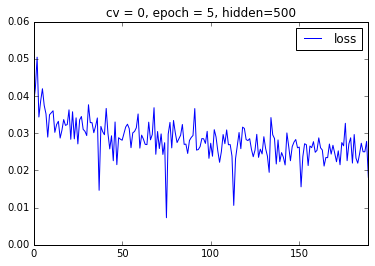

recommendataion on cf_hidden... Epoch 4, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 4, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [6/30], Step [1/38], Loss: 0.0244
Epoch [6/30], Step [2/38], Loss: 0.0252
Epoch [6/30], Step [3/38], Loss: 0.0208
Epoch [6/30], Step [4/38], Loss: 0.0258
Epoch [6/30], Step [5/38], Loss: 0.0248
Epoch [6/30], Step [6/38], Loss: 0.0249
Epoch [6/30], Step [7/38], Loss: 0.0218
Epoch [6/30], Step [8/38], Loss: 0.0278
Epoch [6/30], Step [9/38], Loss: 0.0238
Epoch [6/30], Step [10/38], Loss: 0.0266
Epoch [6/30], Step [11/38], Loss: 0.0258
Epoch [6/30], Step [12/38], Loss: 0.0253
Epoch [6/30], Step [13/38], Loss: 0.0245
Epoch [6/30], Step [14/38], Loss: 0.0268
Epoch [6/30], Step [15/38], Loss: 0.0223
Epoch [6/30], Step [16/38], Loss: 0.0271
Epoch [6/30], Step [17/38], Loss: 0.0300
Epoch [6/30], Step [18/38], Loss: 0.0294
Epoch [6/30], Step [19/38], Loss: 0.0195
Epoch [6/30], Step [20/38], Loss: 0.0227
Epoch [6/30], Step [21/38], Loss: 0.0242
Epoch [6/30], Step [22/38], Loss: 0.0219
Epoch [6/30], Step [23/38], Loss: 0.0269
Epoch [6/30], Step [24/38], Loss: 0.0195
Epoch [6/30], Step [25/38

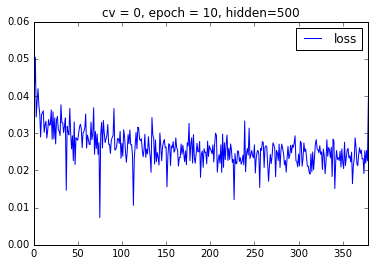

recommendataion on cf_hidden... Epoch 9, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 9, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [11/30], Step [1/38], Loss: 0.0198
Epoch [11/30], Step [2/38], Loss: 0.0231
Epoch [11/30], Step [3/38], Loss: 0.0242
Epoch [11/30], Step [4/38], Loss: 0.0213
Epoch [11/30], Step [5/38], Loss: 0.0232
Epoch [11/30], Step [6/38], Loss: 0.0261
Epoch [11/30], Step [7/38], Loss: 0.0245
Epoch [11/30], Step [8/38], Loss: 0.0243
Epoch [11/30], Step [9/38], Loss: 0.0224
Epoch [11/30], Step [10/38], Loss: 0.0239
Epoch [11/30], Step [11/38], Loss: 0.0266
Epoch [11/30], Step [12/38], Loss: 0.0230
Epoch [11/30], Step [13/38], Loss: 0.0228
Epoch [11/30], Step [14/38], Loss: 0.0238
Epoch [11/30], Step [15/38], Loss: 0.0231
Epoch [11/30], Step [16/38], Loss: 0.0205
Epoch [11/30], Step [17/38], Loss: 0.0258
Epoch [11/30], Step [18/38], Loss: 0.0231
Epoch [11/30], Step [19/38], Loss: 0.0244
Epoch [11/30], Step [20/38], Loss: 0.0200
Epoch [11/30], Step [21/38], Loss: 0.0227
Epoch [11/30], Step [22/38], Loss: 0.0239
Epoch [11/30], Step [23/38], Loss: 0.0199
Epoch [11/30], Step [24/38], Loss: 0.0213
E

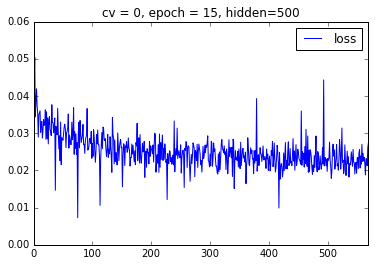

recommendataion on cf_hidden... Epoch 14, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 14, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [16/30], Step [1/38], Loss: 0.0244
Epoch [16/30], Step [2/38], Loss: 0.0191
Epoch [16/30], Step [3/38], Loss: 0.0210
Epoch [16/30], Step [4/38], Loss: 0.0194
Epoch [16/30], Step [5/38], Loss: 0.0193
Epoch [16/30], Step [6/38], Loss: 0.0215
Epoch [16/30], Step [7/38], Loss: 0.0181
Epoch [16/30], Step [8/38], Loss: 0.0208
Epoch [16/30], Step [9/38], Loss: 0.0251
Epoch [16/30], Step [10/38], Loss: 0.0262
Epoch [16/30], Step [11/38], Loss: 0.0238
Epoch [16/30], Step [12/38], Loss: 0.0245
Epoch [16/30], Step [13/38], Loss: 0.0237
Epoch [16/30], Step [14/38], Loss: 0.0232
Epoch [16/30], Step [15/38], Loss: 0.0231
Epoch [16/30], Step [16/38], Loss: 0.0222
Epoch [16/30], Step [17/38], Loss: 0.0262
Epoch [16/30], Step [18/38], Loss: 0.0206
Epoch [16/30], Step [19/38], Loss: 0.0207
Epoch [16/30], Step [20/38], Loss: 0.0207
Epoch [16/30], Step [21/38], Loss: 0.0219
Epoch [16/30], Step [22/38], Loss: 0.0223
Epoch [16/30], Step [23/38], Loss: 0.0207
Epoch [16/30], Step [24/38], Loss: 0.0261
E

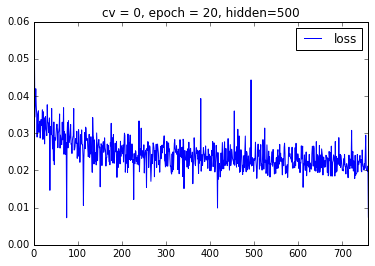

recommendataion on cf_hidden... Epoch 19, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 19, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [21/30], Step [1/38], Loss: 0.0219
Epoch [21/30], Step [2/38], Loss: 0.0230
Epoch [21/30], Step [3/38], Loss: 0.0165
Epoch [21/30], Step [4/38], Loss: 0.0250
Epoch [21/30], Step [5/38], Loss: 0.0222
Epoch [21/30], Step [6/38], Loss: 0.0206
Epoch [21/30], Step [7/38], Loss: 0.0224
Epoch [21/30], Step [8/38], Loss: 0.0191
Epoch [21/30], Step [9/38], Loss: 0.0205
Epoch [21/30], Step [10/38], Loss: 0.0200
Epoch [21/30], Step [11/38], Loss: 0.0196
Epoch [21/30], Step [12/38], Loss: 0.0205
Epoch [21/30], Step [13/38], Loss: 0.0217
Epoch [21/30], Step [14/38], Loss: 0.0205
Epoch [21/30], Step [15/38], Loss: 0.0196
Epoch [21/30], Step [16/38], Loss: 0.0230
Epoch [21/30], Step [17/38], Loss: 0.0195
Epoch [21/30], Step [18/38], Loss: 0.0199
Epoch [21/30], Step [19/38], Loss: 0.0208
Epoch [21/30], Step [20/38], Loss: 0.0229
Epoch [21/30], Step [21/38], Loss: 0.0175
Epoch [21/30], Step [22/38], Loss: 0.0211
Epoch [21/30], Step [23/38], Loss: 0.0228
Epoch [21/30], Step [24/38], Loss: 0.0186
E

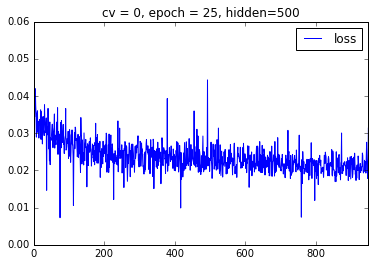

recommendataion on cf_hidden... Epoch 24, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 24, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 24, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

Epoch [26/30], Step [1/38], Loss: 0.0210
Epoch [26/30], Step [2/38], Loss: 0.0217
Epoch [26/30], Step [3/38], Loss: 0.0183
Epoch [26/30], Step [4/38], Loss: 0.0212
Epoch [26/30], Step [5/38], Loss: 0.0210
Epoch [26/30], Step [6/38], Loss: 0.0233
Epoch [26/30], Step [7/38], Loss: 0.0180
Epoch [26/30], Step [8/38], Loss: 0.0184
Epoch [26/30], Step [9/38], Loss: 0.0169
Epoch [26/30], Step [10/38], Loss: 0.0162
Epoch [26/30], Step [11/38], Loss: 0.0212
Epoch [26/30], Step [12/38], Loss: 0.0225
Epoch [26/30], Step [13/38], Loss: 0.0230
Epoch [26/30], Step [14/38], Loss: 0.0255
Epoch [26/30], Step [15/38], Loss: 0.0236
Epoch [26/30], Step [16/38], Loss: 0.0211
Epoch [26/30], Step [17/38], Loss: 0.0215
Epoch [26/30], Step [18/38], Loss: 0.0196
Epoch [26/30], Step [19/38], Loss: 0.0194
Epoch [26/30], Step [20/38], Loss: 0.0208
Epoch [26/30], Step [21/38], Loss: 0.0227
Epoch [26/30], Step [22/38], Loss: 0.0221
Epoch [26/30], Step [23/38], Loss: 0.0206
Epoch [26/30], Step [24/38], Loss: 0.0209
E

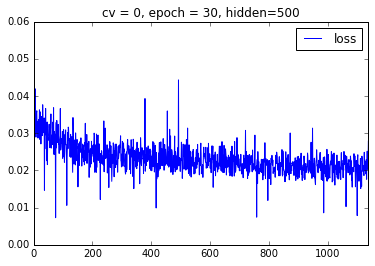

recommendataion on cf_hidden... Epoch 29, layper output


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 29, layper hidden


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

recommendataion on cf_hidden... Epoch 29, layper hidden_relu


/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_by

In [107]:
input_size = 6040
hidden_size = 500
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 30
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    repres = dict()
    if (epoch+1) % 5 == 0:
#         model = copy.deepcopy(net)
        name = 'test-repres-%s-epoch_%s_cv.%s'%(str(net).replace('\n',''), epoch+1, cv)
        torch.save(net.state_dict(), name)
        repres[epoch] = dict()
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s, hidden=%s'%(cv,epoch+1,hidden_size))
        plt.show()
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for key in net.repres.keys():
            repres[epoch][key] = np.zeros([net.repres[key].data.numpy().shape[1], data.train_dataset.train.shape[1]])
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
            for key in net.repres.keys():
                r = repres[epoch][key]
                r[:,item_id] = net.repres[key].data.numpy()

        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        print(pred_perf)
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn,train = data.train_dataset.train, hidden_layers=repres[epoch][key], test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            
        print(cf_perf)

In [80]:
rrr = net.repres
for k in rrr.keys():
    print(k, type(rrr[k].data.numpy()))


output <type 'numpy.ndarray'>
hidden <type 'numpy.ndarray'>
hidden_relu <type 'numpy.ndarray'>


In [75]:
cf_perf

{(0, 'hidden'): (500, (0.3016556291390729, 0.029497930215264295)),
 (0, 'hidden_relu'): (500, (0.34668874172185432, 0.031243053887361462)),
 (0, 'output'): (500, (0.3288079470198676, 0.028796356560260927))}

In [33]:
net.repres['hidden'] == 

Variable containing:
-0.2837 -0.3750 -0.4264  ...  -0.2675 -0.2316 -0.3677
-2.8717 -1.7458 -2.7216  ...  -2.9576 -2.5713 -2.6233
-4.1973 -2.5166 -3.6101  ...  -4.1716 -3.8335 -3.9650
-2.5898 -2.6403 -1.8894  ...  -2.7682 -2.4142 -2.4744
-0.4111 -0.4701 -0.4325  ...  -0.4220 -0.4599 -0.5812
-0.8306 -0.9174 -0.7035  ...  -1.0707 -0.8409 -0.8620
[torch.FloatTensor of size 6x350]

# Does AE learn a identical output

In [139]:
weights = net.state_dict()


In [141]:
print(weights.keys())

['encoder.weight', 'encoder.bias', 'decoder.weight', 'decoder.bias']


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(weights['encoder.weight'].numpy(),cmap='hot')

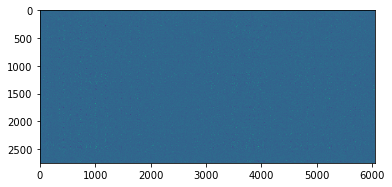

In [168]:
plt.imshow(weights['decoder.weight'].numpy().T)

In [205]:
dot = np.dot(weights['encoder.weight'].numpy(), weights['decoder.weight'].numpy())

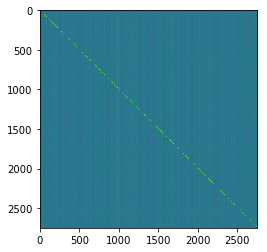

In [208]:
plt.imshow(dot)

In [206]:
dot

array([[-0.06811874, -0.06642805, -0.06349035, ..., -0.02457986,
        -0.09998703, -0.08411996],
       [-0.08395609, -0.08311617, -0.08081705, ..., -0.00802551,
        -0.11190392, -0.10849045],
       [-0.06735272, -0.06429034, -0.04573293, ...,  0.00200594,
        -0.08029235, -0.07347687],
       ..., 
       [-0.03966916, -0.0468316 , -0.05127604, ..., -0.01626786,
        -0.04999548, -0.05283096],
       [-0.09002064, -0.08158938, -0.09258346, ..., -0.02870565,
        -0.10932627, -0.09836444],
       [-0.07668656, -0.08308107, -0.08675831, ..., -0.02527406,
        -0.10856836, -0.10624984]], dtype=float32)

# AE with regularization  identity weight

In [6]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)
        self.repres = dict()

    def forward(self, x):
        out = self.encoder(x)
        self.repres['hidden'] = out.clone()
        out = self.relu(out)
        self.repres['hidden_relu'] = out.clone()
        out = self.decoder(out)
        self.repres['output'] = out.clone()
        return out


In [9]:
import dataset
reload(dataset)
cv = 0
data = dataset.load_data(cv=cv)

In [20]:
data.test_dataset.test.nonzero()[0].shape[0] + data.train_dataset.train.nonzero()[0].shape[0]

1000208

In [23]:
sum(data.test_dataset.test[data.train_dataset.train.nonzero()] == 1)

0

In [32]:
input_size = 6040
hidden_size = 2750
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()

net = Net(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 10
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
#         print(i_batch,sample_batched)
        
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        weight_reg = torch.mm(net.encoder.weight, net.decoder.weight)
        weight_reg = weight_reg.sub(Variable(torch.eye(weight_reg.data.size(0))))
#         print(weight_reg)
        weight_reg = torch.norm(weight_reg) 
    

        #- torch.eye(net.encoder.weight.data.size()[0]))
        loss = certeria(outputs, sample) + Variable(torch.FloatTensor([0.2])) * weight_reg
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(data.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])
    if (epoch+1) % 3 == 0:
#         model = copy.deepcopy(net)
        name = 'model-epoch_%s.pkl'%(epoch+1)
        torch.save(net.state_dict(), name)
        print('recommendataion on prediction... Epoch %s'%(epoch+1))
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s'%(cv,epoch+1))

        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        pred_perf[epoch+1] = pred_recommend(train=data.train_dataset.train , test=data.test_dataset.test, predicted= predicted)
        
        for key in net.repres.keys():
            print('recommendataion on cf_hidden... Epoch %s, layper %s'%(epoch, key))
            hidden_layer = output.data.numpy()
            cf_result = cf_on_hidden_layer(knn=knn, hidden_layers=hidden_layer, test=data.test_dataset.test)
            cf_perf[(epoch+1, key)] = (cf_result)            


Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 11.1137
Epoch [1/10], Step [2/38], Loss: 10.1317
Epoch [1/10], Step [3/38], Loss: 9.2054
Epoch [1/10], Step [4/38], Loss: 8.3282
Epoch [1/10], Step [5/38], Loss: 7.5080
Epoch [1/10], Step [6/38], Loss: 6.7281


Process Process-169:
Process Process-170:
Process Process-168:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process Process-167:
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", l

Epoch [1/10], Step [7/38], Loss: 5.9995


KeyboardInterrupt
    buf = self.recv_bytes()
    racquire()
KeyboardInterrupt
KeyboardInterrupt


KeyboardInterrupt: 

In [30]:
pred_perf

{3: (0.25066225165562916, 0.017215554019274638),
 6: (0.26920529801324505, 0.018194413955770074),
 9: (0.28642384105960267, 0.02085237167742008)}

In [31]:
cf_perf

{(3, 'hidden'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (3, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (3, 'output'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (6, 'hidden'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (6, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (6, 'output'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (9, 'hidden'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (9, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (9, 'output'): (500, (0.022185430463576163, 0.0015880471763444069))}

In [ ]:
dot_prod = (torch.mm(net.encoder.weight, net.decoder.weight))

In [ ]:
plt.imshow()

In [25]:
df = pd.DataFrame(np.random.random((2,13)))

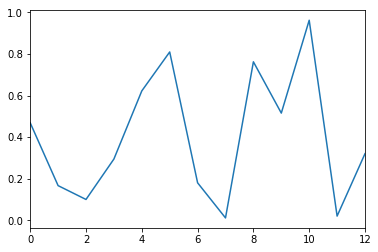

In [46]:
# df = df.transpose()
df.plot(kind='line')
# df.columns = ['x','y']
# df = df['x']
# df

overfit !!!!!!!!!!!!!

In [2]:
net_static_dict = torch.load('model-epoch_5.pkl')

In [5]:
net2 = Net(6040,2750,6040)
net2.load_state_dict(net_static_dict)
net = net2

In [7]:
dot_prod = (torch.mm(net.encoder.weight, net.decoder.weight))

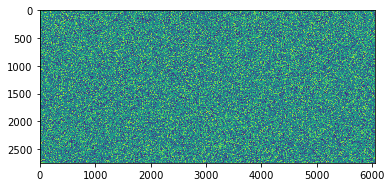

In [7]:
plt.imshow(net.encoder.weight.data.numpy())


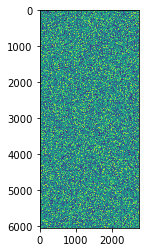

In [8]:
plt.imshow(net.decoder.weight.data.numpy())


In [9]:
dot_prod = (torch.mm(net.encoder.weight, net.decoder.weight).data.numpy())

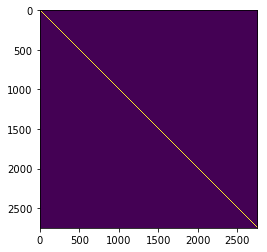

In [14]:
plt.imshow(dot_prod)

In [15]:
k

array([[  1.00006866e+00,  -5.79388798e-05,  -1.05935149e-04, ...,
          3.00311949e-04,   1.58515642e-04,  -9.57679003e-05],
       [ -1.18864438e-04,   1.00028956e+00,  -6.12580043e-05, ...,
          1.80489849e-04,  -1.24360900e-04,  -1.68038998e-04],
       [  1.55754678e-04,  -3.58092424e-04,   1.00017214e+00, ...,
          3.72747891e-05,  -6.31413423e-05,   9.37626464e-06],
       ..., 
       [  2.47772550e-04,  -2.16287561e-04,  -8.71894881e-05, ...,
          9.99841511e-01,  -7.51491170e-05,  -2.24943738e-04],
       [  9.32982657e-05,   7.95094820e-05,   1.39122829e-04, ...,
          3.18884850e-05,   9.99757707e-01,  -7.57611415e-05],
       [  1.92338368e-04,   3.31284624e-04,   8.80648731e-05, ...,
          1.72182103e-04,   3.21460539e-06,   9.99864578e-01]], dtype=float32)

KeyboardInterrupt: 

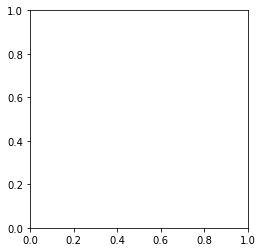

In [9]:
plt.imshow(dot_prod)

In [ ]:
plt.matshow(net.encoder.weight)

In [292]:
((torch.mm(net.encoder.weight, net.decoder.weight) - Variable(torch.eye(2750))) ) 
#* Variable(torch.FloatTensor([0.2]))

Variable containing:
-9.9851e-01 -1.5922e-03  1.2273e-03  ...  -3.6259e-03  4.1646e-04  1.2393e-03
-1.1337e-03 -9.9859e-01  7.7562e-06  ...   4.4175e-03  1.1868e-03  2.0834e-03
-2.3381e-04 -2.1049e-03 -9.9806e-01  ...  -4.5801e-04  5.7092e-04  2.1102e-03
                ...                   ⋱                   ...                
 5.5921e-04  4.1429e-04  2.8982e-04  ...  -1.0007e+00 -1.9584e-03 -1.2782e-03
 2.3016e-03  2.7107e-04  2.4238e-03  ...  -2.0452e-04 -9.9970e-01  8.8548e-04
 1.3236e-03 -9.3301e-04  1.6251e-03  ...  -3.6113e-03 -7.6296e-04 -1.0001e+00
[torch.FloatTensor of size 2750x2750]

In [291]:
type(torch.eye(2750))

torch.FloatTensor

In [269]:
 (torch.FloatTensor([0.2])) 


 0.2000
[torch.FloatTensor of size 1]

In [227]:
net.decoder.weight

Parameter containing:
-1.8700e-11  1.4978e-11 -1.1026e-11  ...   2.5387e-12  7.0502e-13 -1.0767e-12
 3.7673e-12 -1.8598e-12 -2.3589e-11  ...   3.2064e-12 -1.1296e-11 -9.6280e-12
-7.8541e-12  1.4520e-11 -1.2609e-11  ...   5.4768e-12  5.7778e-12  3.9593e-12
                ...                   ⋱                   ...                
 8.1113e-12 -6.6659e-12  1.0235e-11  ...  -2.8491e-11 -7.5161e-13 -1.7691e-11
 1.6186e-11 -1.5801e-11  2.9983e-11  ...   1.2374e-12  7.0557e-12  1.1507e-11
-3.3526e-12  2.8638e-11  2.9143e-11  ...   1.6184e-11 -1.8634e-12 -1.1361e-12
[torch.FloatTensor of size 6040x2750]

In [158]:
type(weights['encoder.weight'].numpy())

numpy.ndarray

In [252]:
torch.eye(2750L)


    1     0     0  ...      0     0     0
    0     1     0  ...      0     0     0
    0     0     1  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      1     0     0
    0     0     0  ...      0     1     0
    0     0     0  ...      0     0     1
[torch.FloatTensor of size 2750x2750]

In [250]:
net.encoder.weight.data.size()[0]

2750L

In [102]:
cf_perf

{(5, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (10, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (15, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (20, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (25, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069)),
 (30, 'hidden_relu'): (500, (0.022185430463576163, 0.0015880471763444069))}

In [42]:
input_size = 6040
hidden_size = 500
output_size = 6040
net = Net(input_size, hidden_size, output_size)


# completetly linear AE

In [197]:
import torch

class LinearNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearNet, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out



LinearNet (
  (encoder): Linear (6040 -> 2750)
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0600
Epoch [1/20], Step [2/38], Loss: 0.0723
Epoch [1/20], Step [3/38], Loss: 0.3006
Epoch [1/20], Step [4/38], Loss: 0.0499
Epoch [1/20], Step [5/38], Loss: 0.1040
Epoch [1/20], Step [6/38], Loss: 0.0659
Epoch [1/20], Step [7/38], Loss: 0.0839
Epoch [1/20], Step [8/38], Loss: 0.1003
Epoch [1/20], Step [9/38], Loss: 0.1029
Epoch [1/20], Step [10/38], Loss: 0.0550
Epoch [1/20], Step [11/38], Loss: 0.1223
Epoch [1/20], Step [12/38], Loss: 0.0551
Epoch [1/20], Step [13/38], Loss: 0.0709
Epoch [1/20], Step [14/38], Loss: 0.0534
Epoch [1/20], Step [15/38], Loss: 0.0860
Epoch [1/20], Step [16/38], Loss: 0.0586
Epoch [1/20], Step [17/38], Loss: 0.0769
Epoch [1/20], Step [18/38], Loss: 0.0599
Epoch [1/20], Step [19/38], Loss: 0.0564
Epoch [1/20], Step [20/38], Loss: 0.0593
Epoch [1/20], Step [21/38], Loss: 0.0493
Epoch [1/20], Step [22/38], Loss: 0.0588
Epoch [1/20], Step [23/

Epoch [6/20], Step [10/38], Loss: 0.0167
Epoch [6/20], Step [11/38], Loss: 0.0195
Epoch [6/20], Step [12/38], Loss: 0.0158
Epoch [6/20], Step [13/38], Loss: 0.0179
Epoch [6/20], Step [14/38], Loss: 0.0175
Epoch [6/20], Step [15/38], Loss: 0.0164
Epoch [6/20], Step [16/38], Loss: 0.0217
Epoch [6/20], Step [17/38], Loss: 0.0147
Epoch [6/20], Step [18/38], Loss: 0.0143
Epoch [6/20], Step [19/38], Loss: 0.0149
Epoch [6/20], Step [20/38], Loss: 0.0155
Epoch [6/20], Step [21/38], Loss: 0.0146
Epoch [6/20], Step [22/38], Loss: 0.0171
Epoch [6/20], Step [23/38], Loss: 0.0192
Epoch [6/20], Step [24/38], Loss: 0.0145
Epoch [6/20], Step [25/38], Loss: 0.0160
Epoch [6/20], Step [26/38], Loss: 0.0173
Epoch [6/20], Step [27/38], Loss: 0.0179
Epoch [6/20], Step [28/38], Loss: 0.0187
Epoch [6/20], Step [29/38], Loss: 0.0140
Epoch [6/20], Step [30/38], Loss: 0.0164
Epoch [6/20], Step [31/38], Loss: 0.0183
Epoch [6/20], Step [32/38], Loss: 0.0179
Epoch [6/20], Step [33/38], Loss: 0.0170
Epoch [6/20], St

Epoch [11/20], Step [19/38], Loss: 0.0100
Epoch [11/20], Step [20/38], Loss: 0.0092
Epoch [11/20], Step [21/38], Loss: 0.0085
Epoch [11/20], Step [22/38], Loss: 0.0094
Epoch [11/20], Step [23/38], Loss: 0.0100
Epoch [11/20], Step [24/38], Loss: 0.0091
Epoch [11/20], Step [25/38], Loss: 0.0097
Epoch [11/20], Step [26/38], Loss: 0.0088
Epoch [11/20], Step [27/38], Loss: 0.0088
Epoch [11/20], Step [28/38], Loss: 0.0106
Epoch [11/20], Step [29/38], Loss: 0.0100
Epoch [11/20], Step [30/38], Loss: 0.0091
Epoch [11/20], Step [31/38], Loss: 0.0096
Epoch [11/20], Step [32/38], Loss: 0.0089
Epoch [11/20], Step [33/38], Loss: 0.0105
Epoch [11/20], Step [34/38], Loss: 0.0101
Epoch [11/20], Step [35/38], Loss: 0.0099
Epoch [11/20], Step [36/38], Loss: 0.0090
Epoch [11/20], Step [37/38], Loss: 0.0080
Epoch [11/20], Step [38/38], Loss: 0.0116
recommendataion on prediction... Epoch 10
Epoch [12/20], Step [1/38], Loss: 0.0075
Epoch [12/20], Step [2/38], Loss: 0.0109
Epoch [12/20], Step [3/38], Loss: 0.

Epoch [16/20], Step [25/38], Loss: 0.7223
Epoch [16/20], Step [26/38], Loss: 1.8131
Epoch [16/20], Step [27/38], Loss: 0.8877
Epoch [16/20], Step [28/38], Loss: 1.3110
Epoch [16/20], Step [29/38], Loss: 0.4187
Epoch [16/20], Step [30/38], Loss: 1.8065
Epoch [16/20], Step [31/38], Loss: 0.6043
Epoch [16/20], Step [32/38], Loss: 0.8418
Epoch [16/20], Step [33/38], Loss: 1.1644
Epoch [16/20], Step [34/38], Loss: 0.4650
Epoch [16/20], Step [35/38], Loss: 0.8596
Epoch [16/20], Step [36/38], Loss: 0.9594
Epoch [16/20], Step [37/38], Loss: 0.4143
Epoch [16/20], Step [38/38], Loss: 0.1506
recommendataion on prediction... Epoch 15
Epoch [17/20], Step [1/38], Loss: 0.7848
Epoch [17/20], Step [2/38], Loss: 2.4861
Epoch [17/20], Step [3/38], Loss: 0.7043
Epoch [17/20], Step [4/38], Loss: 0.5347
Epoch [17/20], Step [5/38], Loss: 0.6354
Epoch [17/20], Step [6/38], Loss: 0.9003
Epoch [17/20], Step [7/38], Loss: 1.1187
Epoch [17/20], Step [8/38], Loss: 2.8671
Epoch [17/20], Step [9/38], Loss: 0.8221
E

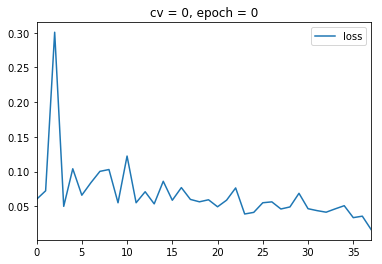

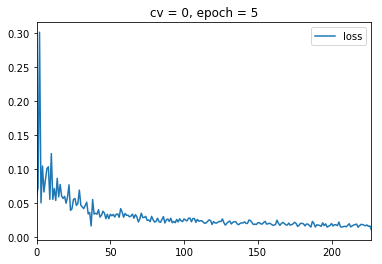

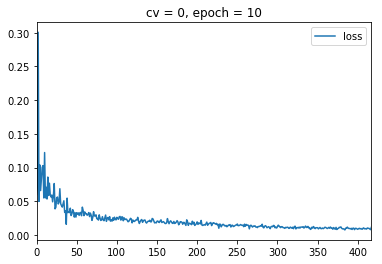

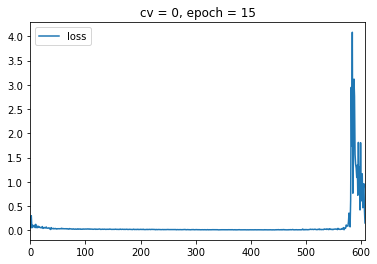

In [199]:
input_size = 6040
hidden_size = 2750
output_size = 6040
loss_history = list()
learning_rate = 0.001

knn = 500

pred_perf = dict()
cf_perf = dict()

linearNet = LinearNet(input_size, hidden_size, output_size)

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(linearNet.parameters(), lr=learning_rate)
print(linearNet.train())
num_epochs = 20
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data.train_loader):
        #         print(i_batch,sample_batched)

        sample = Variable(sample_batched['sample'])
        #         print(sample)
        #         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = linearNet(sample)
        loss = certeria(outputs, sample)
        #         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()

        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
               % (epoch + 1, num_epochs, i_batch + 1,
                  len(data.train_loader), loss.data[0]))
        loss_history.append(loss.data[0])
    if epoch >= 0 and epoch % 5 == 0:
        #         model = copy.deepcopy(net)
        name = 'model-epoch_%s' % epoch
        torch.save(linearNet.state_dict(), name)
        print('recommendataion on prediction... Epoch %s' % epoch)
        loss_df = pd.DataFrame(loss_history, columns=['loss'])
        loss_df.plot(title='cv = %s, epoch = %s' % (cv, epoch))

        predicted = np.zeros_like(data.test_dataset.data)
        # dataset.test_dataset.part = 'all'
        for item_id in xrange(data.test_dataset.data.shape[1]):
            sample = Variable(torch.from_numpy(data.test_dataset.test[:, item_id]))
            output = linearNet(sample)
            #     print(type(test_input['id']))
            predicted[:, item_id] = output.data.numpy()
        pred_perf[epoch] = pred_recommend(train=data.train_dataset.train, test=data.test_dataset.test,
                                          predicted=predicted)

#         for key in linearNet.repres.keys():
#             print('recommendataion on cf_hidden... Epoch %s, layper %s' % (epoch, key))
#             hidden_layer = output.data.numpy()
#             cf_result = cf_on_hidden_layer(knn=knn, hidden_layers=hidden_layer, test=data.test_dataset.test)
#         cf_perf[(epoch, key)] = (cf_result)            


In [113]:
torch.save(net,'aa.pt')

In [114]:
a = torch.load('aa.pt')

In [118]:
torch.save(net.state_dict(),'aa_sd.pkl')

In [119]:
b = torch.load('aa_sd.pkl')

In [125]:
c = Net(input_size, hidden_size, output_size)
c.load_state_dict(b)

In [126]:
c

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)

In [3]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.R
        self.repres = dict()

    def forward(self, x):
        out = self.encoder(x)
        self.repres['hidden'] = out.clone()
        out = self.relu(out)
        self.repres['hidden_relu'] = out.clone()
        out = self.decoder(out)
        self.repres['output'] = out.clone()
        return out

